# Supervised Learning - Foundations Project: ReCell 

## Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
## Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
## Data Description
The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.

**Data Dictionary**

- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries and data

In [1]:
# import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# remove limit for columns 
pd.set_option("display.max_columns", None)
# set displayed rows to 100 for better snapshot of data 
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model - this one giving issues, updated statsmodels 
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#load data
df = pd.read_csv("used_device_data.csv")

#import VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# class provided function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

## Data Overview

- Observations
- Sanity checks

In [3]:
#check the shape of the data 
print(df.shape)

(3454, 15)


In [4]:
#show random sample of the data 
df.sample(n=10, random_state=1)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
866,Others,Android,15.24,no,no,8.00,2.0,16.0,4.00,3000.0,206.0,2014,632,4.038832,5.190788
957,Celkon,Android,10.16,no,no,3.15,0.3,512.0,0.25,1400.0,140.0,2013,637,2.800325,3.884652
280,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.00,5000.0,185.0,2020,329,4.370713,4.487287
2150,Oppo,Android,12.83,yes,no,13.00,16.0,64.0,4.00,3200.0,148.0,2017,648,4.677863,5.639422
93,LG,Android,15.29,yes,no,13.00,5.0,32.0,3.00,3500.0,179.0,2019,216,4.517650,5.300415
1040,Gionee,Android,12.83,yes,no,13.00,8.0,32.0,4.00,3150.0,166.0,2016,970,4.645640,5.634325
3170,ZTE,Others,10.16,no,no,3.15,5.0,16.0,4.00,1400.0,125.0,2014,1007,3.764451,4.244344
2742,Sony,Android,12.70,yes,no,20.70,2.0,16.0,4.00,3000.0,170.0,2013,1060,4.422809,5.799820
102,Meizu,Android,15.29,yes,no,NaN,20.0,128.0,6.00,3600.0,165.0,2019,332,4.959412,6.040659
1195,HTC,Android,10.29,no,no,8.00,2.0,32.0,4.00,2000.0,146.0,2015,892,4.227855,4.879007


In [5]:
# data info - reviewing data types for possible transformation 
# checking non-null counts vs the 3454 total lines
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [6]:
#statistical summary of data for sanity checks 
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


## Observations 

- there are 15 columns and 3454 rows 
- data has an index column 
- columns with null data include 
    - main_camer_mp (the most, 179 null lines) 
    - sefie_camera_mp (only 2 null, can remove) 
    - internal_memory and ram (both 4 null) 
    - battery (6 null) 
    - weight (7 null) 
- if some rows contain those missing fields can remove those rows entirely, will check 
- unique values 
    - 34 brand names
    - 4 os
- skewness 
    - most number fields are right skewed 
    - days used left skewed 
    - ram  and normalized new price are almost perfeclty normal 
- types 
    - release_year needs to be transformed to categorical variable 

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

#### 1. What does the distribution of normalized used device prices look like?
- distribution is almost normal 
- slightly left skew
    - mean 4.36
    - med 4.40

(array([  3.,   0.,   0.,   0.,   1.,   2.,   3.,   8.,   6.,   4.,   5.,
         13.,  14.,  15.,  21.,  23.,  28.,  41.,  48.,  65.,  90.,  95.,
        114., 153., 194., 220., 241., 271., 284., 259., 229., 216., 189.,
        169., 128.,  96.,  63.,  49.,  34.,  25.,  14.,   8.,   4.,   3.,
          1.,   3.,   0.,   0.,   1.,   1.]),
 array([1.53686722, 1.63851854, 1.74016985, 1.84182117, 1.94347248,
        2.0451238 , 2.14677511, 2.24842643, 2.35007774, 2.45172906,
        2.55338038, 2.65503169, 2.75668301, 2.85833432, 2.95998564,
        3.06163695, 3.16328827, 3.26493959, 3.3665909 , 3.46824222,
        3.56989353, 3.67154485, 3.77319616, 3.87484748, 3.97649879,
        4.07815011, 4.17980143, 4.28145274, 4.38310406, 4.48475537,
        4.58640669, 4.688058  , 4.78970932, 4.89136064, 4.99301195,
        5.09466327, 5.19631458, 5.2979659 , 5.39961721, 5.50126853,
        5.60291985, 5.70457116, 5.80622248, 5.90787379, 6.00952511,
        6.11117642, 6.21282774, 6.31447905, 6.

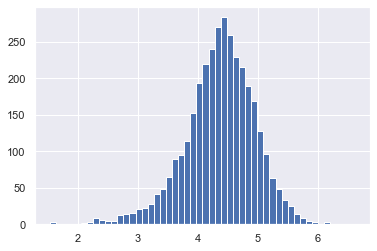

In [7]:
plt.hist(df['normalized_used_price'],bins=50)

#### 2. What percentage of the used device market is dominated by Android devices?
93.1% of the market is dominated by Android devices

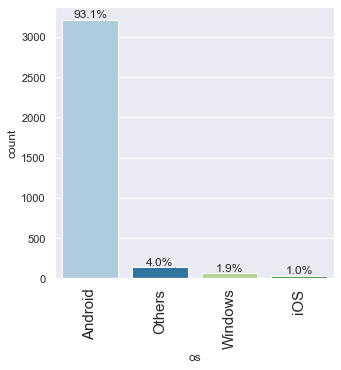

In [8]:
labeled_barplot(df,'os',perc=True)

#### 3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

Observations: 
- Almost all brands have a mode of 4 
- OnePlus has the highest mean at 6.3, with a very high IQR 
- Celkon is essentially the opposite, with the lowest mean at 1.6 and a very low IQR 
- Nokia also has most of its ram below the typical 4 


brand_name
Celkon        1.613636
Nokia         2.420294
Infinix       2.600000
Lava          3.277778
Karbonn       3.353448
Alcatel       3.407025
Micromax      3.679487
Spice         3.750000
Others        3.777888
BlackBerry    3.829545
Lenovo        3.885965
Acer          3.901961
Gionee        3.933036
LG            3.936567
Motorola      3.943396
Coolpad       3.954545
HTC           4.000000
Panasonic     4.000000
Apple         4.000000
XOLO          4.000000
Microsoft     4.000000
ZTE           4.023214
Asus          4.049180
Sony          4.069767
Realme        4.195122
Samsung       4.199413
Meizu         4.451613
Google        4.533333
Xiaomi        4.583333
Honor         4.603448
Huawei        4.655378
Vivo          4.756410
Oppo          4.961240
OnePlus       6.363636
Name: ram, dtype: float64


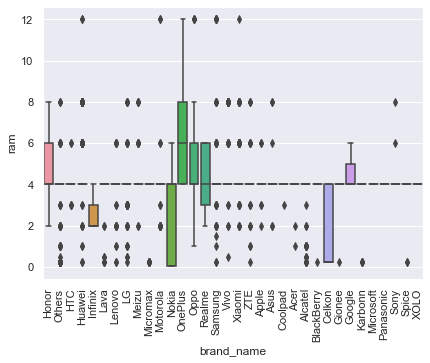

In [9]:
#creating a sub table grouped by brand name and mean ram 
df_brand_name_ram_mean = df.groupby('brand_name')['ram'].mean().sort_values(ascending=True)

print(df_brand_name_ram_mean)

#plotting
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y="ram", x="brand_name")
plt.xticks(rotation=90)

plt.show()



#### 4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

Observations
- There are only 341 items with large batteries >4500 
- the min weight for smaller battery phones is 69 vs 118 for large batteries 
- the mean for large battery phones was twice that of smaller (332 vs 165) 
- both sets included weights between 118-175 
- however, the max for both groups was almost the same 850
    - this one item appears to have appropriate data in the other fields
    - it's just a MASSIVE item 

In [10]:
#creating a sub table with only large batteries >4500 
df_large_batteries = df[(df['battery']>4500)]
df_large_batteries.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
11,Honor,Android,15.32,yes,no,13.0,8.0,64.0,4.0,5000.0,185.0,2020,344,4.657383,4.770176
19,Honor,Android,25.43,yes,no,5.0,2.0,32.0,3.0,5100.0,173.0,2019,266,4.267878,5.517051
20,Honor,Android,20.32,yes,no,8.0,8.0,32.0,3.0,5100.0,173.0,2019,321,4.556295,5.304001


In [11]:
#creating a second sub table with only batteries < 4500 to compare  
df_small_batteries = df[(df['battery']<4500)]
df_small_batteries.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
5,Honor,Android,16.23,yes,no,13.0,8.0,64.0,4.0,4000.0,176.0,2020,223,4.413889,5.060694
6,Honor,Android,13.84,yes,no,8.0,5.0,32.0,2.0,3020.0,144.0,2020,234,3.878259,4.518958


In [12]:
df_large_batteries = df_large_batteries['weight']
df_large_batteries.describe()

count    341.000000
mean     332.275660
std      155.501832
min      118.000000
25%      198.000000
50%      300.000000
75%      467.000000
max      855.000000
Name: weight, dtype: float64

In [13]:
df_small_batteries = df_small_batteries['weight']
df_small_batteries.describe()

count    3035.000000
mean      165.249885
std        56.352159
min        69.000000
25%       140.000000
50%       155.000000
75%       175.000000
max       850.000000
Name: weight, dtype: float64

In [14]:
#quality check for that 850 max weight on small batteries
#creating third subset with only small batteries and large weight
df_small_check = df[(df['battery']<4500)]
df_small_check = df_small_check[(df['weight']>800)]

df_small_check

C:\Users\ABRAMH~1\AppData\Local\Temp\1/ipykernel_254136/4264581636.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_small_check = df_small_check[(df['weight']>800)]


,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1141,Others,Android,30.56,no,no,8.0,2.0,32.0,4.0,2500.0,850.0,2015,652,5.23931,6.194773


#### 5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

Observations
- There are 1099 devices with screens > 6" (15.24 cm) 
- Huawei, Samsung, and "others" have the most devices larger than 6" 
- 5 brands have between 59 and 80 devices 
- 5 brands have 24-42 devices, 
- over half the brands have less than 15 devices larger than 6" 
- Microsoft only has 1 

In [15]:
#creating subset with only screens > 6" (15.24 cm)
df_large_screens = df[(df['screen_size']>15.24)]
df_large_screens

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
5,Honor,Android,16.23,yes,no,13.0,8.0,64.0,4.0,4000.0,176.0,2020,223,4.413889,5.060694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447,Apple,iOS,15.27,yes,no,8.0,7.0,64.0,4.0,3110.0,194.0,2019,208,5.100902,6.287933
3448,Asus,Android,16.74,yes,no,NaN,24.0,128.0,8.0,6000.0,240.0,2019,325,5.715316,7.059317
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829


<function matplotlib.pyplot.show(close=None, block=None)>

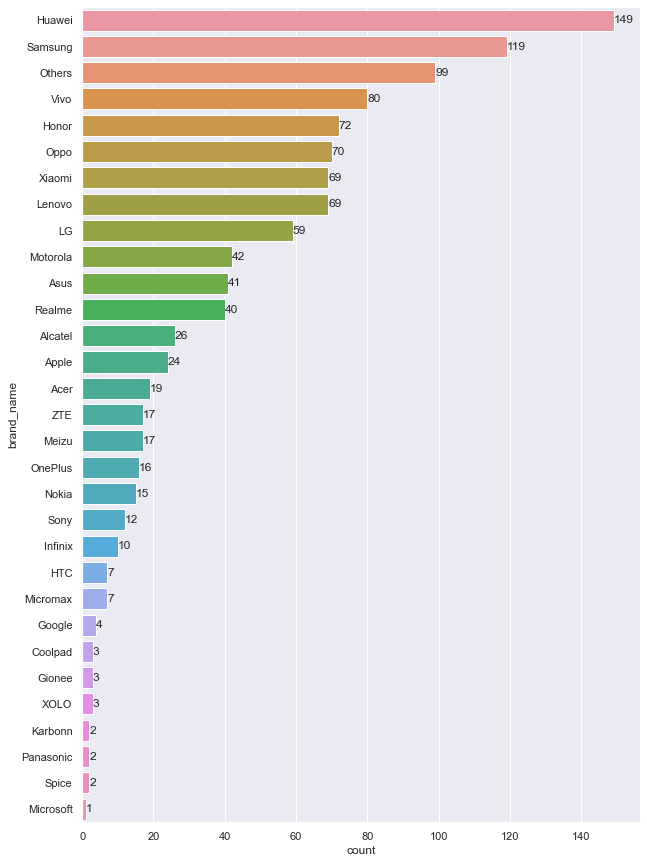

In [16]:
#plotting total devices >6" by brand in desc order 
plt.figure(figsize=(10, 15))

ax = sns.countplot(data=df_large_screens,y='brand_name', order = df_large_screens['brand_name'].value_counts().index)
abs_values = df_large_screens['brand_name'].value_counts().values

ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.show

#### 6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

Observations: 
- similar to large screens, Huawei and vivo have the most devices with high quality selfie cams, along with Oppo and Xiaomi  
- Half of the brands have less than 15 devices with high quality selfie cams 

In [17]:
#creating subset with only selfie cameras with  > 8MP 
df_nice_selfie_bro = df[(df['selfie_camera_mp']>8)]
df_nice_selfie_bro

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
8,Honor,Android,15.32,yes,no,13.0,16.0,128.0,6.0,4000.0,165.0,2020,161,4.886054,5.299916
12,Honor,Android,16.69,yes,yes,13.0,16.0,128.0,8.0,4100.0,206.0,2019,537,5.383256,6.213968
13,Honor,Android,15.32,yes,no,13.0,16.0,64.0,4.0,4000.0,171.5,2019,336,4.617593,5.398751
16,Honor,Android,15.90,yes,no,13.0,32.0,128.0,6.0,3750.0,172.0,2019,395,5.022366,5.517935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3438,Samsung,Android,15.34,yes,no,12.0,16.0,32.0,3.0,4000.0,169.0,2019,369,4.760377,5.049151
3439,Samsung,Android,15.34,yes,no,12.0,32.0,64.0,4.0,4000.0,169.0,2019,315,5.137092,5.443240
3440,Samsung,Android,15.44,yes,no,12.0,10.0,256.0,12.0,4300.0,196.0,2019,489,5.200153,6.509499
3441,Samsung,Android,15.32,yes,no,12.0,10.0,256.0,8.0,3500.0,168.0,2019,429,5.205050,6.250940


<function matplotlib.pyplot.show(close=None, block=None)>

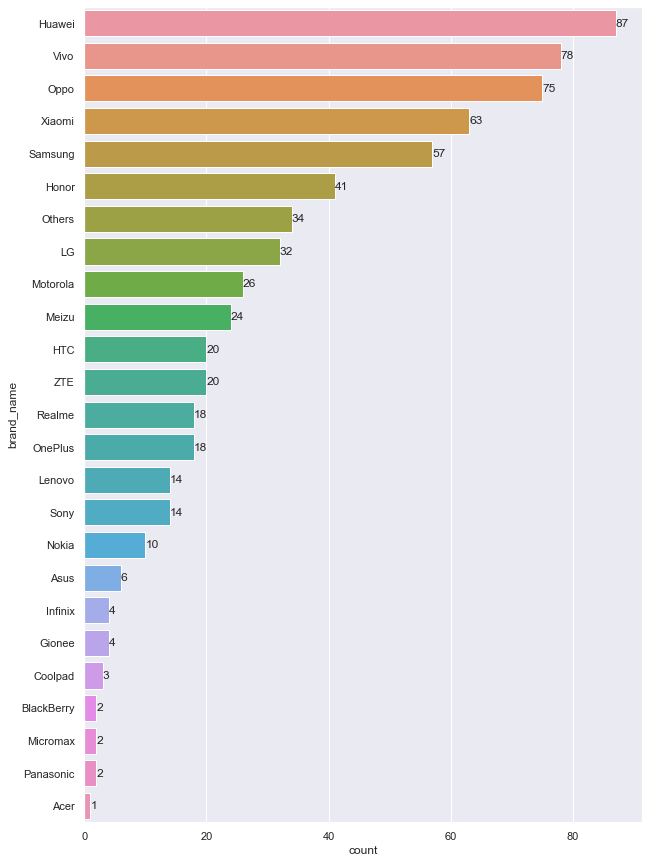

In [18]:
#plotting total devices >8 selfie cams by brand in desc order 
plt.figure(figsize=(10, 15))

ax2 = sns.countplot(data=df_nice_selfie_bro,y='brand_name', order = df_nice_selfie_bro['brand_name'].value_counts().index)
abs_values = df_nice_selfie_bro['brand_name'].value_counts().values

ax2.bar_label(container=ax2.containers[0], labels=abs_values)
plt.show

#### 7. Which attributes are highly correlated with the normalized price of a used device?

- normalized new price is highly correlated to normalized used price 
- I am not going to remove this, however, since normalized used price is our target value/output 

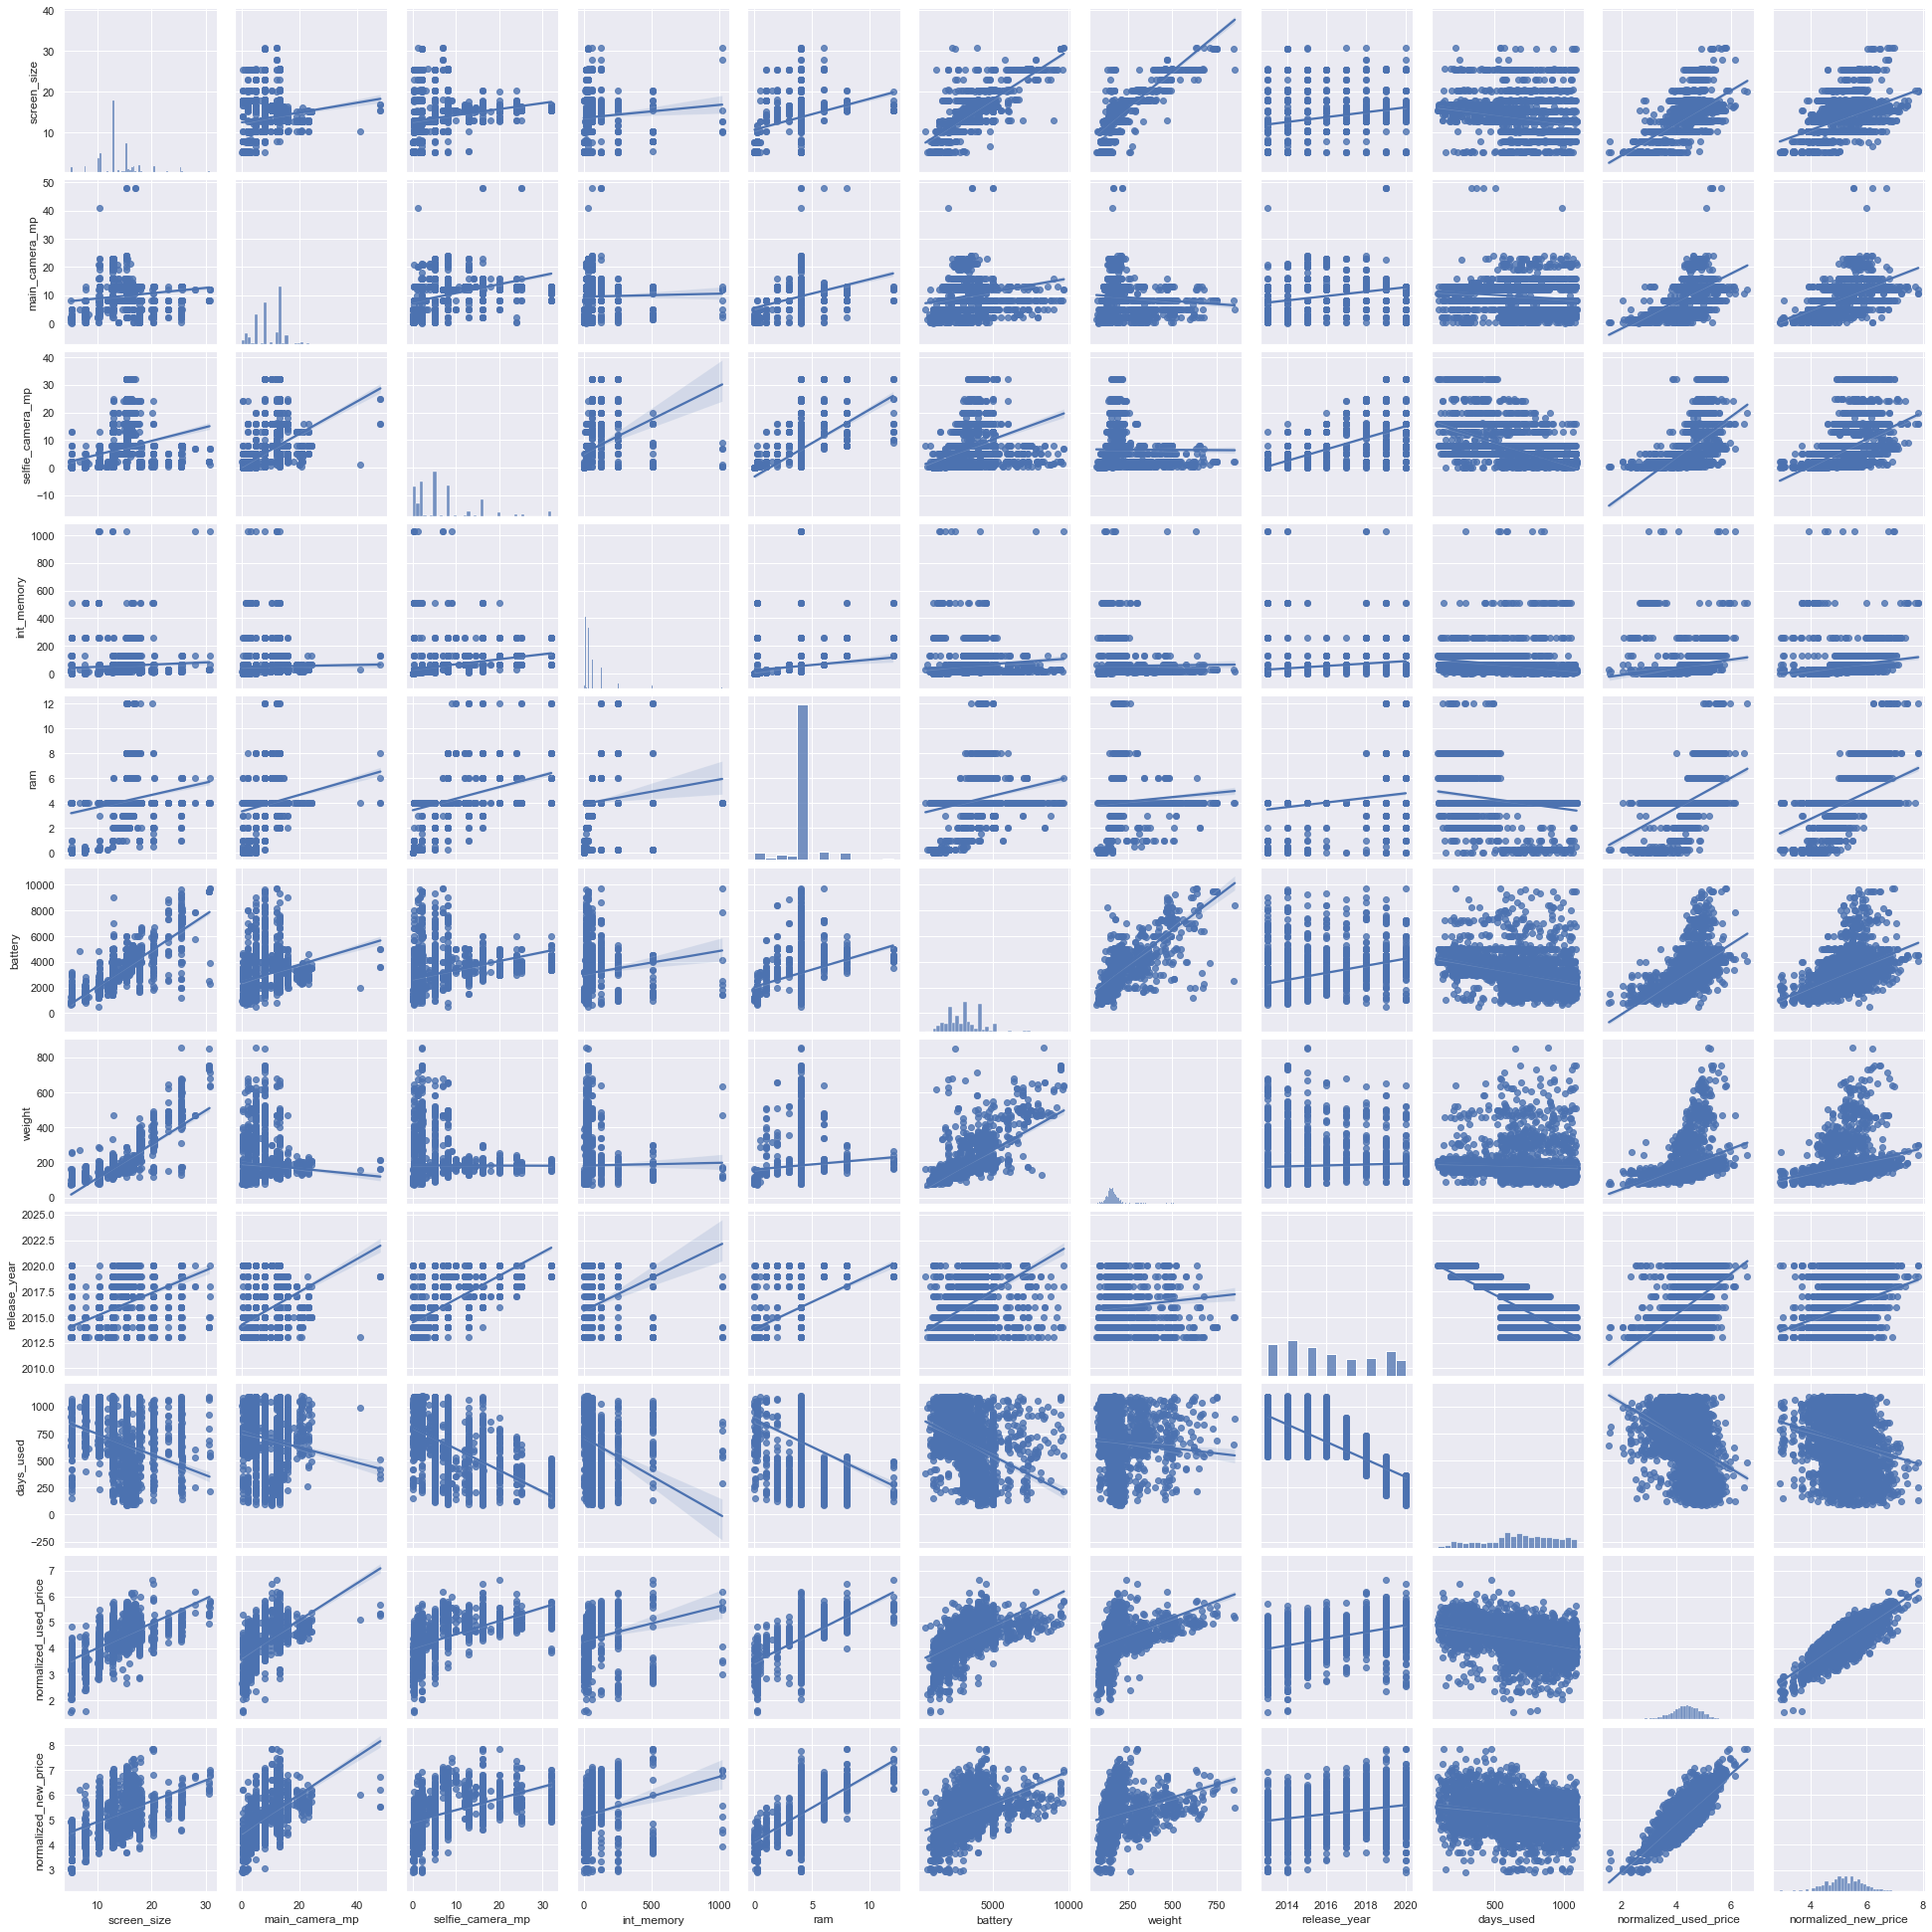

In [19]:
#creating pairplot to review correlation 
sns.pairplot(df, kind='reg')
plt.show()

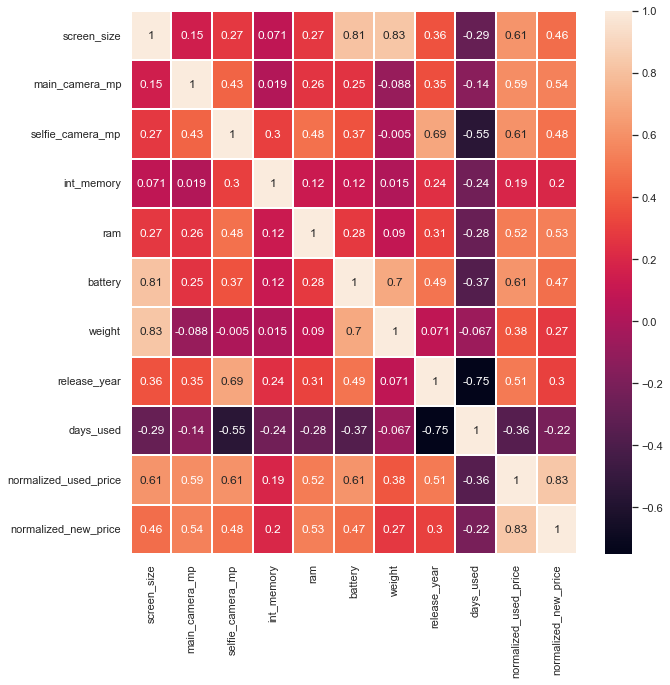

In [20]:
#creating heatmap for correlation numbers 
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05)
plt.show()

#### Additional Correlations: 

- Highly correlated pairs (>0.8 or < -0.8) - need to drop screen size
    - screen_size vs battery 
    - screen_size vs weight 
- Fairly correlated pairs (>0.7 or <-0.7) 
    - days_used vs release_year (could be redundant but not always) 
    - battery vs weight (as shown in previous analysis question) 
- Slightly correlated pairs (>0.5 or <-0.5) 
    - ram vs new and used price 
    - main camera mp vs new and used price 
    - selfie camera mp vs only used price (less so new price) 
    - battery vs used price 
    - release year vs used price 
    - release year vs selfie cam mp, but not main camera mp 

#### Reviewing skews of categories for future feature engineering 

In [23]:
#reviewing info for list of items to review 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

<AxesSubplot:xlabel='main_camera_mp', ylabel='Count'>

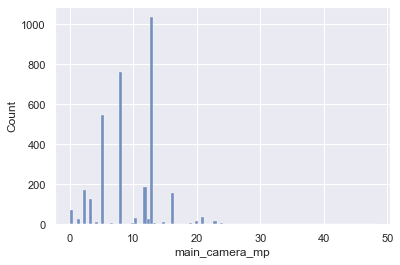

In [24]:
#main_camera_mp = slightly skewed, possible outliers  
#no log needed 
sns.histplot(df.main_camera_mp,bins=100)

<AxesSubplot:xlabel='selfie_camera_mp', ylabel='Count'>

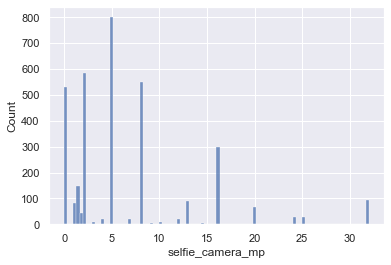

In [25]:
#selfie_camera_mp = slightly skewed
#no log needed
sns.histplot(df.selfie_camera_mp,bins=100)

<AxesSubplot:xlabel='int_memory', ylabel='Count'>

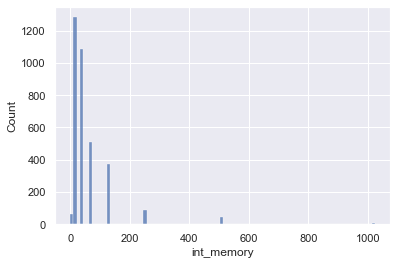

In [26]:
#int_memory = fairly skewed, will perform log transformation
sns.histplot(df.int_memory,bins=100)

<AxesSubplot:xlabel='ram', ylabel='Count'>

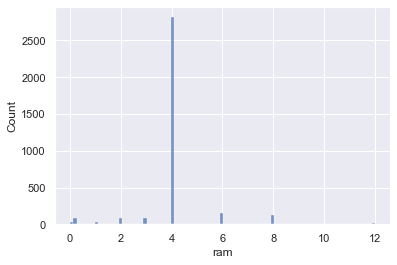

In [27]:
#ram = almost normal distribution
sns.histplot(df.ram,bins=100)

<AxesSubplot:xlabel='battery', ylabel='Count'>

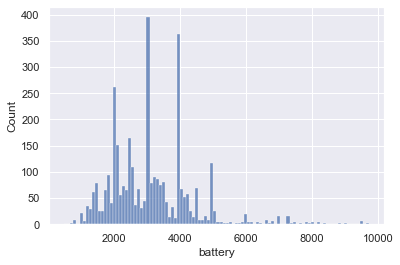

In [28]:
#battery = slightly skewed but won't transform 
sns.histplot(df.battery,bins=100)

<AxesSubplot:xlabel='weight', ylabel='Count'>

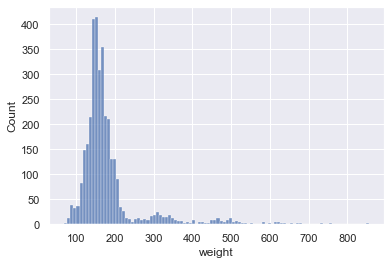

In [29]:
#weight = fairly skewed, will perform log transformation 
sns.histplot(df.weight,bins=100)

<AxesSubplot:xlabel='days_used', ylabel='Count'>

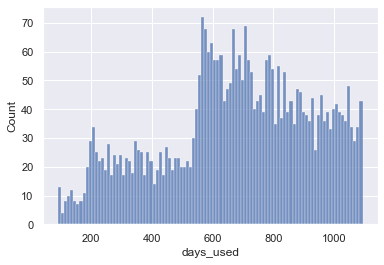

In [30]:
#days_used = slightly skewed but won't transform initially 
sns.histplot(df.days_used,bins=100)

<AxesSubplot:xlabel='normalized_used_price', ylabel='Count'>

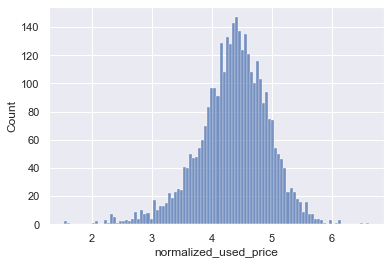

In [31]:
#normalized_used_price = almost normally distributed with slight skew
sns.histplot(df.normalized_used_price,bins=100)

<AxesSubplot:xlabel='normalized_new_price', ylabel='Count'>

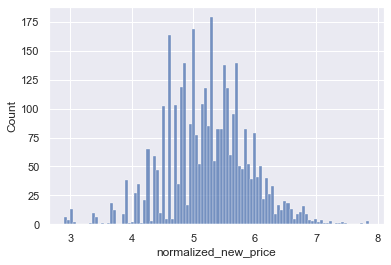

In [32]:
#normalized_new_price = smilar to used price, almost normal distribution 
sns.histplot(df.normalized_new_price,bins=100)

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

#### Missing Value Treatment

In [33]:
#re-run info to review which missing values need to be acknowledged 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [34]:
#making a copy of the data for first round of changes 
df2 = df.copy()

In [35]:
#checking for duplicate values
df2.duplicated().sum()

0

In [36]:
#checking total missing values 
df2.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [37]:
#dropping null values for the items with <10 missing values 
df2.dropna(subset=['selfie_camera_mp'],inplace=True)
df2.dropna(subset=['int_memory'],inplace=True)
df2.dropna(subset=['ram'],inplace=True)
df2.dropna(subset=['battery'],inplace=True)
df2.dropna(subset=['weight'],inplace=True)

In [38]:
df2.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           0
int_memory                 0
ram                        0
battery                    0
weight                     0
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [39]:
#changing release_year to category 
df2['release_year']=df2['release_year'].astype('category')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3432 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   brand_name             3432 non-null   object  
 1   os                     3432 non-null   object  
 2   screen_size            3432 non-null   float64 
 3   4g                     3432 non-null   object  
 4   5g                     3432 non-null   object  
 5   main_camera_mp         3253 non-null   float64 
 6   selfie_camera_mp       3432 non-null   float64 
 7   int_memory             3432 non-null   float64 
 8   ram                    3432 non-null   float64 
 9   battery                3432 non-null   float64 
 10  weight                 3432 non-null   float64 
 11  release_year           3432 non-null   category
 12  days_used              3432 non-null   int64   
 13  normalized_used_price  3432 non-null   float64 
 14  normalized_new_price   3432 non-null   f

In [40]:
#pulling just the line items with missing main_camera_mp           
df2_no_main_cam = df2[df2.main_camera_mp.isnull()]
df2_no_main_cam

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
59,Infinix,Android,17.32,yes,no,NaN,8.0,32.0,2.0,6000.0,209.0,2020,245,4.282068,4.597642
60,Infinix,Android,15.39,yes,no,NaN,8.0,64.0,4.0,5000.0,185.0,2020,173,4.363608,4.711780
61,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.0,5000.0,185.0,2020,256,4.181439,4.505460
62,Infinix,Android,15.39,yes,no,NaN,16.0,32.0,3.0,4000.0,178.0,2019,316,4.555244,4.602166
63,Infinix,Android,15.29,yes,no,NaN,16.0,32.0,2.0,4000.0,165.0,2019,468,4.416670,4.871297
64,Lava,Android,14.50,yes,no,NaN,5.0,32.0,2.0,3200.0,150.0,2020,356,3.989910,4.381026
97,Meizu,Android,15.39,yes,yes,NaN,20.0,128.0,8.0,4500.0,199.0,2020,186,5.167867,6.272028
98,Meizu,Android,15.37,yes,no,NaN,16.0,128.0,6.0,4500.0,183.0,2019,449,4.665512,5.526329
99,Meizu,Android,15.37,yes,no,NaN,8.0,32.0,2.0,4000.0,184.0,2019,190,4.290185,5.195177
100,Meizu,Android,15.29,yes,no,NaN,20.0,128.0,6.0,3600.0,166.0,2019,459,4.721085,5.830679


In [41]:
df2_no_main_cam.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,179.0,15.845587,0.973714,10.290000,15.340000,15.390000,16.640000,17.810000
main_camera_mp,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
selfie_camera_mp,179.0,15.458101,7.717788,5.000000,8.000000,16.000000,16.000000,32.000000
int_memory,179.0,102.793296,62.725877,32.000000,64.000000,128.000000,128.000000,256.000000
ram,179.0,5.480447,2.450271,2.000000,4.000000,6.000000,8.000000,12.000000
battery,179.0,4304.134078,589.947345,2870.000000,4000.000000,4200.000000,5000.000000,6000.000000
weight,179.0,189.718436,18.008417,150.000000,178.000000,190.200000,202.500000,253.000000
days_used,179.0,287.117318,129.705642,91.000000,194.500000,273.000000,348.500000,875.000000
normalized_used_price,179.0,4.841868,0.467409,2.667228,4.538136,4.852499,5.131098,5.792038
normalized_new_price,179.0,5.590709,0.707187,3.690877,5.036699,5.602672,6.183497,7.090785


In [42]:
#Except for all items being the dominant Android OS, I am not seeing adequate trends to replace the missing main_camera_mp values
# I am going to remove the nulls for the missing main_camera_mp lines to be conservative 
# I want to avoid skewing with incorrect created correlation

df2.dropna(subset=['main_camera_mp'],inplace=True)
df2.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

#### Feature Engineering 

Review: 
- I am not removing any items at this time due to correlation, as there is only one highly correlated pair between our target category (normalized used price) and normalized new price. 
- weight and int_memory both had significant skews, will perform log transformation 

<AxesSubplot:xlabel='weight_log', ylabel='Count'>

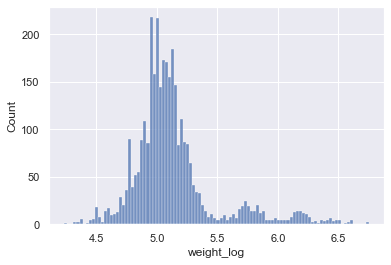

In [43]:
#creating new column of weight with log transformation to reduce skewness 
df2['weight_log']=np.log(df2['weight']+.001)
sns.histplot(df2.weight_log,bins=100)

In [44]:
#confirmed transformation improved shape 
#dropping initial weight column 
df2.drop('weight',axis=1,inplace=True)
df2.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,release_year,days_used,normalized_used_price,normalized_new_price,weight_log
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,2020,127,4.307572,4.715100,4.983613
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,2020,325,5.162097,5.519018,5.361297
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,2020,162,5.111084,5.884631,5.361297
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,2020,345,5.135387,5.630961,6.173788
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,2020,293,4.389995,4.947837,5.220361


<AxesSubplot:xlabel='int_memory_log', ylabel='Count'>

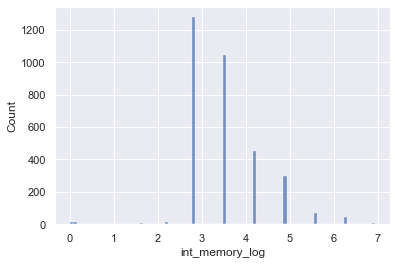

In [45]:
#repeating the same with int_memory 
df2['int_memory_log']=np.log(df2['int_memory']+1)
sns.histplot(df2.int_memory_log,bins=100)

In [46]:
#confirmed transformation of internal memory improved shape 
#dropping initial weight column 
df2.drop('int_memory',axis=1,inplace=True)
df2.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,ram,battery,release_year,days_used,normalized_used_price,normalized_new_price,weight_log,int_memory_log
0,Honor,Android,14.50,yes,no,13.0,5.0,3.0,3020.0,2020,127,4.307572,4.715100,4.983613,4.174387
1,Honor,Android,17.30,yes,yes,13.0,16.0,8.0,4300.0,2020,325,5.162097,5.519018,5.361297,4.859812
2,Honor,Android,16.69,yes,yes,13.0,8.0,8.0,4200.0,2020,162,5.111084,5.884631,5.361297,4.859812
3,Honor,Android,25.50,yes,yes,13.0,8.0,6.0,7250.0,2020,345,5.135387,5.630961,6.173788,4.174387
4,Honor,Android,15.32,yes,no,13.0,8.0,3.0,5000.0,2020,293,4.389995,4.947837,5.220361,4.174387


#### Outlier detection & treatment

In [47]:
# class provided functions to treat outliers by flooring and capping

def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df

Text(0.5, 1.0, 'screen_size')

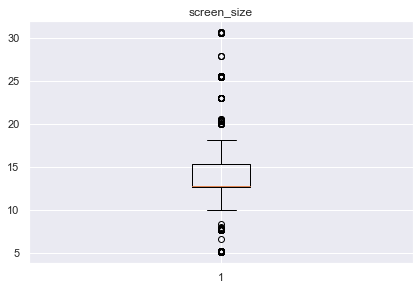

In [48]:
#printing boxplot for screen_size to view outliers 
plt.boxplot(df2['screen_size'],whis=1.5)
plt.tight_layout()
plt.title('screen_size')

In [49]:
#treating screen_size outliers via flooring and capping 
treat_outliers(df2, 'screen_size')

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,ram,battery,release_year,days_used,normalized_used_price,normalized_new_price,weight_log,int_memory_log
0,Honor,Android,14.50,yes,no,13.0,5.0,3.0,3020.0,2020,127,4.307572,4.715100,4.983613,4.174387
1,Honor,Android,17.30,yes,yes,13.0,16.0,8.0,4300.0,2020,325,5.162097,5.519018,5.361297,4.859812
2,Honor,Android,16.69,yes,yes,13.0,8.0,8.0,4200.0,2020,162,5.111084,5.884631,5.361297,4.859812
3,Honor,Android,19.25,yes,yes,13.0,8.0,6.0,7250.0,2020,345,5.135387,5.630961,6.173788,4.174387
4,Honor,Android,15.32,yes,no,13.0,8.0,3.0,5000.0,2020,293,4.389995,4.947837,5.220361,4.174387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447,Apple,iOS,15.27,yes,no,8.0,7.0,4.0,3110.0,2019,208,5.100902,6.287933,5.267863,4.174387
3450,Asus,Android,15.24,yes,no,13.0,8.0,8.0,4000.0,2018,541,5.037732,6.251538,5.298322,4.859812
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,3.0,4000.0,2020,201,4.357350,4.528829,5.105952,3.496508
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,2.0,4000.0,2020,149,4.349762,4.624188,5.075180,3.496508


Text(0.5, 1.0, 'screen_size')

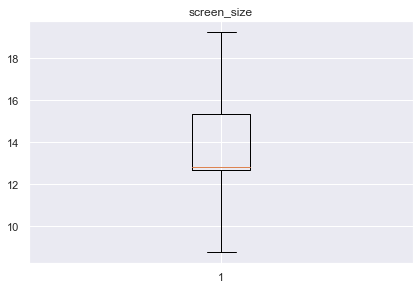

In [50]:
#reprinting boxplot to check outlier fix  
#BEAUTIFUL! 
plt.boxplot(df2['screen_size'],whis=1.5)
plt.tight_layout()
plt.title('screen_size')

Text(0.5, 1.0, 'main_camera_mp')

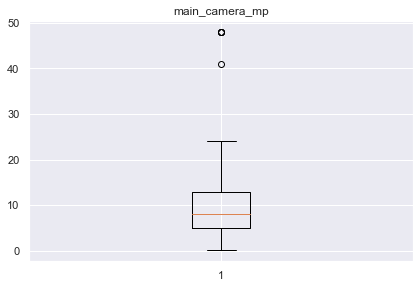

In [51]:
#Same check with main_camera_mp
plt.boxplot(df2['main_camera_mp'],whis=1.5)
plt.tight_layout()
plt.title('main_camera_mp')

#there are a couple outliers 

In [52]:
#treating main_camera_mp outliers via flooring and capping 
treat_outliers(df2, 'main_camera_mp')

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,ram,battery,release_year,days_used,normalized_used_price,normalized_new_price,weight_log,int_memory_log
0,Honor,Android,14.50,yes,no,13.0,5.0,3.0,3020.0,2020,127,4.307572,4.715100,4.983613,4.174387
1,Honor,Android,17.30,yes,yes,13.0,16.0,8.0,4300.0,2020,325,5.162097,5.519018,5.361297,4.859812
2,Honor,Android,16.69,yes,yes,13.0,8.0,8.0,4200.0,2020,162,5.111084,5.884631,5.361297,4.859812
3,Honor,Android,19.25,yes,yes,13.0,8.0,6.0,7250.0,2020,345,5.135387,5.630961,6.173788,4.174387
4,Honor,Android,15.32,yes,no,13.0,8.0,3.0,5000.0,2020,293,4.389995,4.947837,5.220361,4.174387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447,Apple,iOS,15.27,yes,no,8.0,7.0,4.0,3110.0,2019,208,5.100902,6.287933,5.267863,4.174387
3450,Asus,Android,15.24,yes,no,13.0,8.0,8.0,4000.0,2018,541,5.037732,6.251538,5.298322,4.859812
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,3.0,4000.0,2020,201,4.357350,4.528829,5.105952,3.496508
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,2.0,4000.0,2020,149,4.349762,4.624188,5.075180,3.496508


Text(0.5, 1.0, 'main_camera_mp')

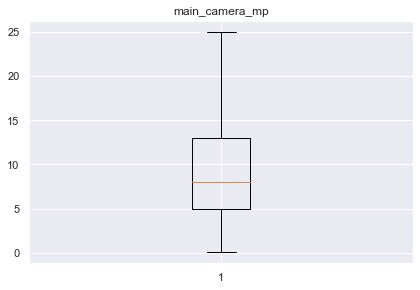

In [53]:
#confirming outliers handled
#they are and it's great 
plt.boxplot(df2['main_camera_mp'],whis=1.5)
plt.tight_layout()
plt.title('main_camera_mp')

Text(0.5, 1.0, 'selfie_camera_mp')

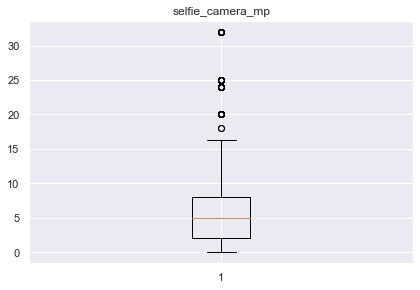

In [54]:
#outlier check with selfie_camera_mp
plt.boxplot(df2['selfie_camera_mp'],whis=1.5)
plt.tight_layout()
plt.title('selfie_camera_mp')


In [55]:
#treating selfie_camera_mp outliers via flooring and capping 
treat_outliers(df2, 'selfie_camera_mp')

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,ram,battery,release_year,days_used,normalized_used_price,normalized_new_price,weight_log,int_memory_log
0,Honor,Android,14.50,yes,no,13.0,5.0,3.0,3020.0,2020,127,4.307572,4.715100,4.983613,4.174387
1,Honor,Android,17.30,yes,yes,13.0,16.0,8.0,4300.0,2020,325,5.162097,5.519018,5.361297,4.859812
2,Honor,Android,16.69,yes,yes,13.0,8.0,8.0,4200.0,2020,162,5.111084,5.884631,5.361297,4.859812
3,Honor,Android,19.25,yes,yes,13.0,8.0,6.0,7250.0,2020,345,5.135387,5.630961,6.173788,4.174387
4,Honor,Android,15.32,yes,no,13.0,8.0,3.0,5000.0,2020,293,4.389995,4.947837,5.220361,4.174387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447,Apple,iOS,15.27,yes,no,8.0,7.0,4.0,3110.0,2019,208,5.100902,6.287933,5.267863,4.174387
3450,Asus,Android,15.24,yes,no,13.0,8.0,8.0,4000.0,2018,541,5.037732,6.251538,5.298322,4.859812
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,3.0,4000.0,2020,201,4.357350,4.528829,5.105952,3.496508
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,2.0,4000.0,2020,149,4.349762,4.624188,5.075180,3.496508


Text(0.5, 1.0, 'selfie_camera_mp')

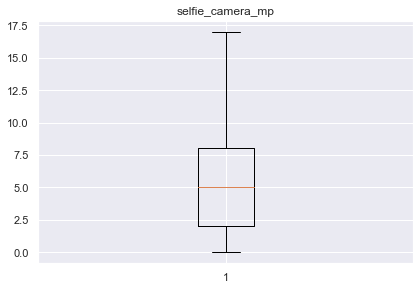

In [56]:
#outlier re-check with selfie_camera_mp
plt.boxplot(df2['selfie_camera_mp'],whis=1.5)
plt.tight_layout()
plt.title('selfie_camera_mp')

Text(0.5, 1.0, 'ram')

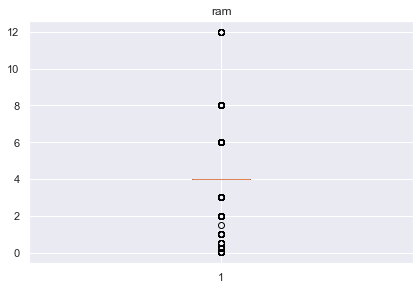

In [57]:
#outlier check with ram
plt.boxplot(df2['ram'],whis=1.5)
plt.tight_layout()
plt.title('ram')

#although there are outliers, removing the outliers will result in a flat number, so I'm NOT going to adjust 

Text(0.5, 1.0, 'battery')

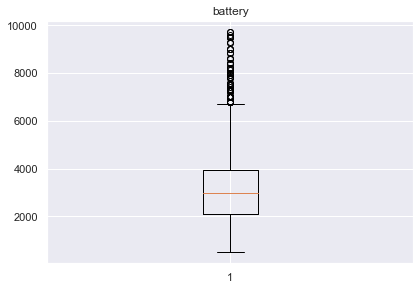

In [58]:
#outlier check with battery
plt.boxplot(df2['battery'],whis=1.5)
plt.tight_layout()
plt.title('battery')

In [59]:
#treating ram outliers via flooring and capping 
treat_outliers(df2, 'battery')

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,ram,battery,release_year,days_used,normalized_used_price,normalized_new_price,weight_log,int_memory_log
0,Honor,Android,14.50,yes,no,13.0,5.0,3.0,3020.0,2020,127,4.307572,4.715100,4.983613,4.174387
1,Honor,Android,17.30,yes,yes,13.0,16.0,8.0,4300.0,2020,325,5.162097,5.519018,5.361297,4.859812
2,Honor,Android,16.69,yes,yes,13.0,8.0,8.0,4200.0,2020,162,5.111084,5.884631,5.361297,4.859812
3,Honor,Android,19.25,yes,yes,13.0,8.0,6.0,6725.0,2020,345,5.135387,5.630961,6.173788,4.174387
4,Honor,Android,15.32,yes,no,13.0,8.0,3.0,5000.0,2020,293,4.389995,4.947837,5.220361,4.174387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447,Apple,iOS,15.27,yes,no,8.0,7.0,4.0,3110.0,2019,208,5.100902,6.287933,5.267863,4.174387
3450,Asus,Android,15.24,yes,no,13.0,8.0,8.0,4000.0,2018,541,5.037732,6.251538,5.298322,4.859812
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,3.0,4000.0,2020,201,4.357350,4.528829,5.105952,3.496508
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,2.0,4000.0,2020,149,4.349762,4.624188,5.075180,3.496508


Text(0.5, 1.0, 'battery')

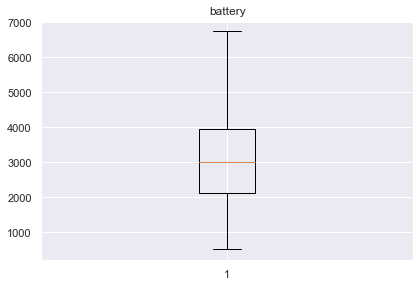

In [60]:
#outlier re-check with battery
plt.boxplot(df2['battery'],whis=1.5)
plt.tight_layout()
plt.title('battery')

Text(0.5, 1.0, 'days_used')

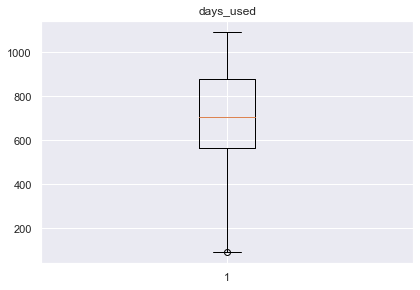

In [61]:
#outlier check with days_used
#none to replace - one small point at the bottom basically at the lower whisker
plt.boxplot(df2['days_used'],whis=1.5)
plt.tight_layout()
plt.title('days_used')

Text(0.5, 1.0, 'normalized_used_price')

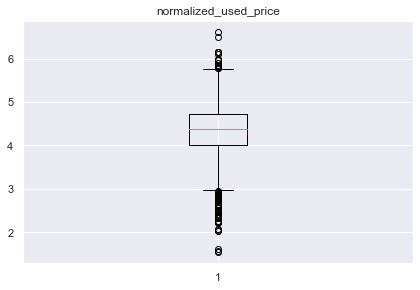

In [62]:
#outlier check with normalized_used_price
#none to replace - one small point at the bottom basically at the lower whisker
plt.boxplot(df2['normalized_used_price'],whis=1.5)
plt.tight_layout()
plt.title('normalized_used_price')

In [63]:
#treating ram outliers via flooring and capping 
treat_outliers(df2, 'normalized_used_price')

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,ram,battery,release_year,days_used,normalized_used_price,normalized_new_price,weight_log,int_memory_log
0,Honor,Android,14.50,yes,no,13.0,5.0,3.0,3020.0,2020,127,4.307572,4.715100,4.983613,4.174387
1,Honor,Android,17.30,yes,yes,13.0,16.0,8.0,4300.0,2020,325,5.162097,5.519018,5.361297,4.859812
2,Honor,Android,16.69,yes,yes,13.0,8.0,8.0,4200.0,2020,162,5.111084,5.884631,5.361297,4.859812
3,Honor,Android,19.25,yes,yes,13.0,8.0,6.0,6725.0,2020,345,5.135387,5.630961,6.173788,4.174387
4,Honor,Android,15.32,yes,no,13.0,8.0,3.0,5000.0,2020,293,4.389995,4.947837,5.220361,4.174387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447,Apple,iOS,15.27,yes,no,8.0,7.0,4.0,3110.0,2019,208,5.100902,6.287933,5.267863,4.174387
3450,Asus,Android,15.24,yes,no,13.0,8.0,8.0,4000.0,2018,541,5.037732,6.251538,5.298322,4.859812
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,3.0,4000.0,2020,201,4.357350,4.528829,5.105952,3.496508
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,2.0,4000.0,2020,149,4.349762,4.624188,5.075180,3.496508


Text(0.5, 1.0, 'normalized_used_price')

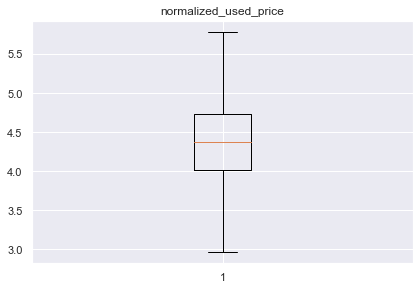

In [64]:
#outlier re-check with normalized_used_price
plt.boxplot(df2['normalized_used_price'],whis=1.5)
plt.tight_layout()
plt.title('normalized_used_price')

Text(0.5, 1.0, 'normalized_new_price')

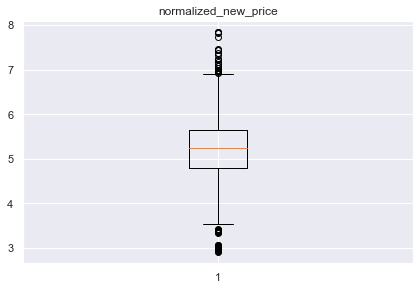

In [65]:
#outlier check with normalized_new_price
plt.boxplot(df2['normalized_new_price'],whis=1.5)
plt.tight_layout()
plt.title('normalized_new_price')

In [66]:
#treating ram outliers via flooring and capping 
treat_outliers(df2, 'normalized_new_price')

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,ram,battery,release_year,days_used,normalized_used_price,normalized_new_price,weight_log,int_memory_log
0,Honor,Android,14.50,yes,no,13.0,5.0,3.0,3020.0,2020,127,4.307572,4.715100,4.983613,4.174387
1,Honor,Android,17.30,yes,yes,13.0,16.0,8.0,4300.0,2020,325,5.162097,5.519018,5.361297,4.859812
2,Honor,Android,16.69,yes,yes,13.0,8.0,8.0,4200.0,2020,162,5.111084,5.884631,5.361297,4.859812
3,Honor,Android,19.25,yes,yes,13.0,8.0,6.0,6725.0,2020,345,5.135387,5.630961,6.173788,4.174387
4,Honor,Android,15.32,yes,no,13.0,8.0,3.0,5000.0,2020,293,4.389995,4.947837,5.220361,4.174387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447,Apple,iOS,15.27,yes,no,8.0,7.0,4.0,3110.0,2019,208,5.100902,6.287933,5.267863,4.174387
3450,Asus,Android,15.24,yes,no,13.0,8.0,8.0,4000.0,2018,541,5.037732,6.251538,5.298322,4.859812
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,3.0,4000.0,2020,201,4.357350,4.528829,5.105952,3.496508
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,2.0,4000.0,2020,149,4.349762,4.624188,5.075180,3.496508


Text(0.5, 1.0, 'normalized_new_price')

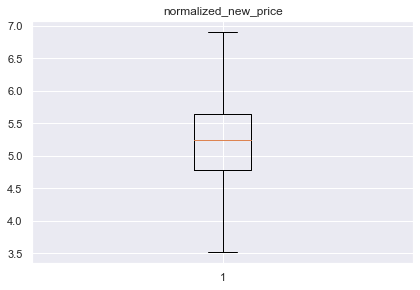

In [67]:
#outlier check with normalized_new_price
plt.boxplot(df2['normalized_new_price'],whis=1.5)
plt.tight_layout()
plt.title('normalized_new_price')

Text(0.5, 1.0, 'weight_log')

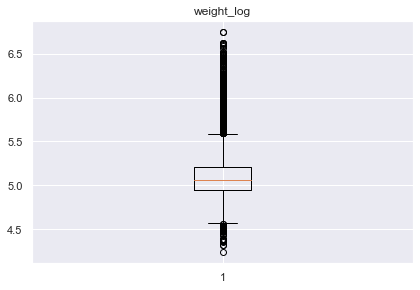

In [68]:
#outlier check with weight_log
plt.boxplot(df2['weight_log'],whis=1.5)
plt.tight_layout()
plt.title('weight_log')

In [69]:
#treating ram outliers via flooring and capping 
treat_outliers(df2, 'weight_log')

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,ram,battery,release_year,days_used,normalized_used_price,normalized_new_price,weight_log,int_memory_log
0,Honor,Android,14.50,yes,no,13.0,5.0,3.0,3020.0,2020,127,4.307572,4.715100,4.983613,4.174387
1,Honor,Android,17.30,yes,yes,13.0,16.0,8.0,4300.0,2020,325,5.162097,5.519018,5.361297,4.859812
2,Honor,Android,16.69,yes,yes,13.0,8.0,8.0,4200.0,2020,162,5.111084,5.884631,5.361297,4.859812
3,Honor,Android,19.25,yes,yes,13.0,8.0,6.0,6725.0,2020,345,5.135387,5.630961,5.592742,4.174387
4,Honor,Android,15.32,yes,no,13.0,8.0,3.0,5000.0,2020,293,4.389995,4.947837,5.220361,4.174387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447,Apple,iOS,15.27,yes,no,8.0,7.0,4.0,3110.0,2019,208,5.100902,6.287933,5.267863,4.174387
3450,Asus,Android,15.24,yes,no,13.0,8.0,8.0,4000.0,2018,541,5.037732,6.251538,5.298322,4.859812
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,3.0,4000.0,2020,201,4.357350,4.528829,5.105952,3.496508
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,2.0,4000.0,2020,149,4.349762,4.624188,5.075180,3.496508


Text(0.5, 1.0, 'weight_log')

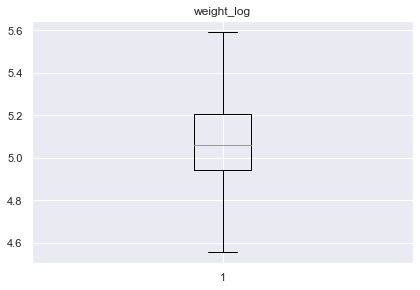

In [70]:
#outlier check with weight_log
plt.boxplot(df2['weight_log'],whis=1.5)
plt.tight_layout()
plt.title('weight_log')

Text(0.5, 1.0, 'int_memory_log')

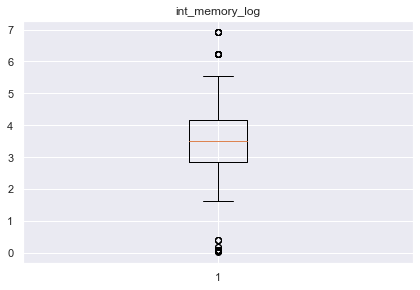

In [71]:
#outlier check with int_memory_log
plt.boxplot(df2['int_memory_log'],whis=1.5)
plt.tight_layout()
plt.title('int_memory_log')

In [72]:
#treating ram outliers via flooring and capping 
treat_outliers(df2, 'int_memory_log')

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,ram,battery,release_year,days_used,normalized_used_price,normalized_new_price,weight_log,int_memory_log
0,Honor,Android,14.50,yes,no,13.0,5.0,3.0,3020.0,2020,127,4.307572,4.715100,4.983613,4.174387
1,Honor,Android,17.30,yes,yes,13.0,16.0,8.0,4300.0,2020,325,5.162097,5.519018,5.361297,4.859812
2,Honor,Android,16.69,yes,yes,13.0,8.0,8.0,4200.0,2020,162,5.111084,5.884631,5.361297,4.859812
3,Honor,Android,19.25,yes,yes,13.0,8.0,6.0,6725.0,2020,345,5.135387,5.630961,5.592742,4.174387
4,Honor,Android,15.32,yes,no,13.0,8.0,3.0,5000.0,2020,293,4.389995,4.947837,5.220361,4.174387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447,Apple,iOS,15.27,yes,no,8.0,7.0,4.0,3110.0,2019,208,5.100902,6.287933,5.267863,4.174387
3450,Asus,Android,15.24,yes,no,13.0,8.0,8.0,4000.0,2018,541,5.037732,6.251538,5.298322,4.859812
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,3.0,4000.0,2020,201,4.357350,4.528829,5.105952,3.496508
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,2.0,4000.0,2020,149,4.349762,4.624188,5.075180,3.496508


Text(0.5, 1.0, 'int_memory_log')

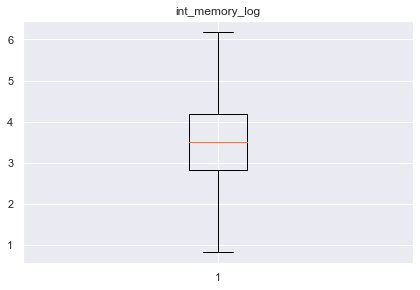

In [73]:
#outlier check with int_memory_log
plt.boxplot(df2['int_memory_log'],whis=1.5)
plt.tight_layout()
plt.title('int_memory_log')

#### Clean Up 4g and 5g

In [74]:
#replacing "yes" and "no" with 1 and 0 for 4g column in new 4g_num column 
df3=df2.copy()
df3['4g_num']=df3['4g'].replace('yes','1').replace('no','0')

#checking change applied
df3

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,ram,battery,release_year,days_used,normalized_used_price,normalized_new_price,weight_log,int_memory_log,4g_num
0,Honor,Android,14.50,yes,no,13.0,5.0,3.0,3020.0,2020,127,4.307572,4.715100,4.983613,4.174387,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,8.0,4300.0,2020,325,5.162097,5.519018,5.361297,4.859812,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,8.0,4200.0,2020,162,5.111084,5.884631,5.361297,4.859812,1
3,Honor,Android,19.25,yes,yes,13.0,8.0,6.0,6725.0,2020,345,5.135387,5.630961,5.592742,4.174387,1
4,Honor,Android,15.32,yes,no,13.0,8.0,3.0,5000.0,2020,293,4.389995,4.947837,5.220361,4.174387,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447,Apple,iOS,15.27,yes,no,8.0,7.0,4.0,3110.0,2019,208,5.100902,6.287933,5.267863,4.174387,1
3450,Asus,Android,15.24,yes,no,13.0,8.0,8.0,4000.0,2018,541,5.037732,6.251538,5.298322,4.859812,1
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,3.0,4000.0,2020,201,4.357350,4.528829,5.105952,3.496508,1
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,2.0,4000.0,2020,149,4.349762,4.624188,5.075180,3.496508,1


In [75]:
#checking change applied to no's 
df3[ (df3['4g']=='no')]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,ram,battery,release_year,days_used,normalized_used_price,normalized_new_price,weight_log,int_memory_log,4g_num
21,Others,Android,19.25,no,no,8.00,0.3,1.0,5680.0,2013,933,4.452136,5.484382,5.592742,2.833213,0
57,Huawei,Android,10.16,no,no,5.00,2.0,4.0,1700.0,2014,666,3.579344,4.703113,4.913397,2.833213,0
58,Huawei,Android,17.78,no,no,3.15,0.3,1.0,4100.0,2013,819,3.982295,5.016551,5.592742,2.197225,0
65,Lava,Android,12.70,no,no,5.00,0.3,0.5,3000.0,2016,819,3.495598,4.113003,4.994513,2.197225,0
67,Lenovo,Android,19.25,no,no,8.00,5.0,4.0,6725.0,2019,419,5.214881,5.775141,5.592742,4.174387,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3180,ZTE,Android,10.29,no,no,8.00,0.3,4.0,2000.0,2013,939,3.617920,4.710971,4.983613,2.833213,0
3181,ZTE,Android,12.70,no,no,8.00,1.3,4.0,2500.0,2013,829,4.008242,5.296816,5.093756,2.833213,0
3182,ZTE,Android,10.16,no,no,5.00,0.3,4.0,1600.0,2013,885,3.674273,5.012966,4.941650,2.833213,0
3184,ZTE,Android,10.16,no,no,3.15,1.0,4.0,1600.0,2013,782,3.745023,4.860975,4.941650,2.833213,0


In [76]:
#same change to 5g column 
#replacing "yes" and "no" with 1 and 0 for 5g column in new 5g_num column 
df3['5g_num']=df3['5g'].replace('yes','1').replace('no','0')

#checking change applied
df3

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,ram,battery,release_year,days_used,normalized_used_price,normalized_new_price,weight_log,int_memory_log,4g_num,5g_num
0,Honor,Android,14.50,yes,no,13.0,5.0,3.0,3020.0,2020,127,4.307572,4.715100,4.983613,4.174387,1,0
1,Honor,Android,17.30,yes,yes,13.0,16.0,8.0,4300.0,2020,325,5.162097,5.519018,5.361297,4.859812,1,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,8.0,4200.0,2020,162,5.111084,5.884631,5.361297,4.859812,1,1
3,Honor,Android,19.25,yes,yes,13.0,8.0,6.0,6725.0,2020,345,5.135387,5.630961,5.592742,4.174387,1,1
4,Honor,Android,15.32,yes,no,13.0,8.0,3.0,5000.0,2020,293,4.389995,4.947837,5.220361,4.174387,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447,Apple,iOS,15.27,yes,no,8.0,7.0,4.0,3110.0,2019,208,5.100902,6.287933,5.267863,4.174387,1,0
3450,Asus,Android,15.24,yes,no,13.0,8.0,8.0,4000.0,2018,541,5.037732,6.251538,5.298322,4.859812,1,0
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,3.0,4000.0,2020,201,4.357350,4.528829,5.105952,3.496508,1,0
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,2.0,4000.0,2020,149,4.349762,4.624188,5.075180,3.496508,1,0


In [77]:
#changing new 4g_num and 5g_num columns to float64 type 

df3['4g_num']=df3['4g_num'].astype('float64')
df3['5g_num']=df3['5g_num'].astype('float64')
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3253 entries, 0 to 3453
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   brand_name             3253 non-null   object  
 1   os                     3253 non-null   object  
 2   screen_size            3253 non-null   float64 
 3   4g                     3253 non-null   object  
 4   5g                     3253 non-null   object  
 5   main_camera_mp         3253 non-null   float64 
 6   selfie_camera_mp       3253 non-null   float64 
 7   ram                    3253 non-null   float64 
 8   battery                3253 non-null   float64 
 9   release_year           3253 non-null   category
 10  days_used              3253 non-null   int64   
 11  normalized_used_price  3253 non-null   float64 
 12  normalized_new_price   3253 non-null   float64 
 13  weight_log             3253 non-null   float64 
 14  int_memory_log         3253 non-null   f

#### Dropping transformed and highly correlated columns 

In [78]:
#dropping original 4g and 5 g columns 
df3.drop('4g',axis=1,inplace=True)
df3.drop('5g',axis=1,inplace=True)

In [79]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3253 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   brand_name             3253 non-null   object  
 1   os                     3253 non-null   object  
 2   screen_size            3253 non-null   float64 
 3   main_camera_mp         3253 non-null   float64 
 4   selfie_camera_mp       3253 non-null   float64 
 5   ram                    3253 non-null   float64 
 6   battery                3253 non-null   float64 
 7   release_year           3253 non-null   category
 8   days_used              3253 non-null   int64   
 9   normalized_used_price  3253 non-null   float64 
 10  normalized_new_price   3253 non-null   float64 
 11  weight_log             3253 non-null   float64 
 12  int_memory_log         3253 non-null   float64 
 13  4g_num                 3253 non-null   float64 
 14  5g_num                 3253 non-null   f

In [80]:
#dropping screen size due to high correlation with battery AND weight (above .8)
df3.drop('screen_size',axis=1,inplace=True)

In [81]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3253 entries, 0 to 3453
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   brand_name             3253 non-null   object  
 1   os                     3253 non-null   object  
 2   main_camera_mp         3253 non-null   float64 
 3   selfie_camera_mp       3253 non-null   float64 
 4   ram                    3253 non-null   float64 
 5   battery                3253 non-null   float64 
 6   release_year           3253 non-null   category
 7   days_used              3253 non-null   int64   
 8   normalized_used_price  3253 non-null   float64 
 9   normalized_new_price   3253 non-null   float64 
 10  weight_log             3253 non-null   float64 
 11  int_memory_log         3253 non-null   float64 
 12  4g_num                 3253 non-null   float64 
 13  5g_num                 3253 non-null   float64 
dtypes: category(1), float64(10), int64(1), o

## EDA

- re-running basic univariate and bivariate analyses 
   - bar charts 
   - histograms 
   - correlation heat map  

<AxesSubplot:xlabel='normalized_used_price', ylabel='brand_name'>

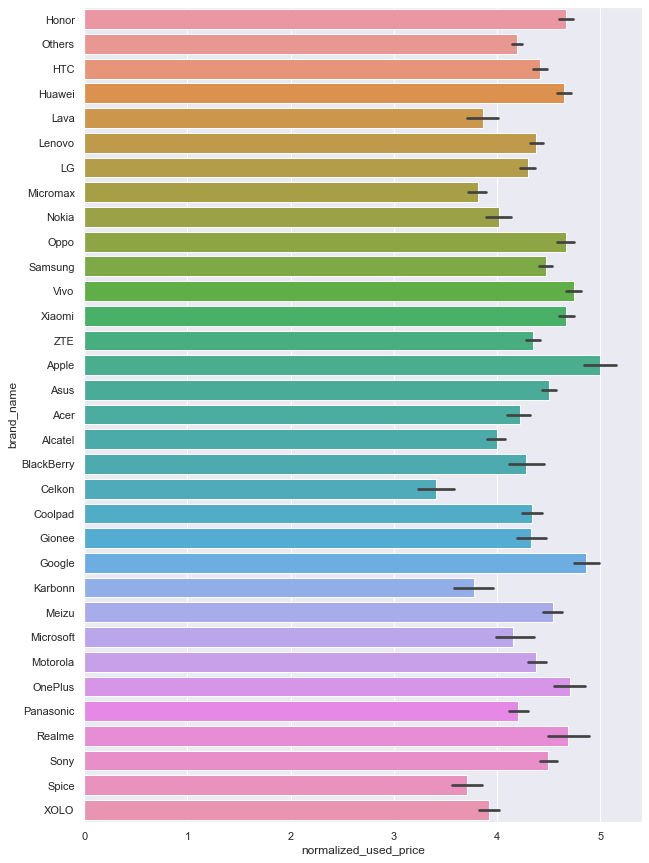

In [82]:
#quickbrand_name by price 
plt.figure(figsize=(10, 15))
sns.barplot(data = df3, x='normalized_used_price',y='brand_name')

In [83]:
#general spread and trends match the outlier fixes that I put in place 
df3.describe()

,main_camera_mp,selfie_camera_mp,ram,battery,days_used,normalized_used_price,normalized_new_price,weight_log,int_memory_log,4g_num,5g_num
count,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000
mean,9.443154,5.587181,3.962960,3046.902705,695.695358,4.348894,5.219324,5.093583,3.500633,0.660314,0.026130
std,4.615141,5.112670,1.225895,1194.332720,235.454084,0.552567,0.651075,0.241914,0.842974,0.473676,0.159546
min,0.080000,0.000000,0.020000,500.000000,91.000000,2.959730,3.515788,4.556128,0.821452,0.000000,0.000000
25%,5.000000,2.000000,4.000000,2100.000000,564.000000,4.019262,4.789157,4.944859,2.833213,0.000000,0.000000
50%,8.000000,5.000000,4.000000,3000.000000,705.000000,4.377642,5.242223,5.062601,3.496508,1.000000,0.000000
75%,13.000000,8.000000,4.000000,3950.000000,879.000000,4.725616,5.638070,5.204012,4.174387,1.000000,0.000000
max,25.000000,17.000000,12.000000,6725.000000,1094.000000,5.785148,6.911439,5.592742,6.186148,1.000000,1.000000


## Building a Linear Regression model

#### Creating Dependent Variable 
- X = dataset to model 
- y = dependent variable 

#### Creating Dummy variables for object and category series 
- brand_name
- os
- release_year

Note: 4g and 5g have been transformed into numerical yes/no values and are now float64 types already, though not considered dummy variables since one device can be both 4 and 5g 

In [84]:
#defining dependent variable 
X = df3.drop(['normalized_used_price'], axis = 1)
y = df3['normalized_used_price']

In [85]:
X.head()

,brand_name,os,main_camera_mp,selfie_camera_mp,ram,battery,release_year,days_used,normalized_new_price,weight_log,int_memory_log,4g_num,5g_num
0,Honor,Android,13.0,5.0,3.0,3020.0,2020,127,4.715100,4.983613,4.174387,1.0,0.0
1,Honor,Android,13.0,16.0,8.0,4300.0,2020,325,5.519018,5.361297,4.859812,1.0,1.0
2,Honor,Android,13.0,8.0,8.0,4200.0,2020,162,5.884631,5.361297,4.859812,1.0,1.0
3,Honor,Android,13.0,8.0,6.0,6725.0,2020,345,5.630961,5.592742,4.174387,1.0,1.0
4,Honor,Android,13.0,8.0,3.0,5000.0,2020,293,4.947837,5.220361,4.174387,1.0,0.0


In [86]:
#Creating new variable with dummy variables 
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

# to set all variables as float type
X = X.astype(float)

In [87]:
X.head()

,main_camera_mp,selfie_camera_mp,ram,battery,days_used,normalized_new_price,weight_log,int_memory_log,4g_num,5g_num,brand_name_Alcatel,brand_name_Apple,brand_name_Asus,brand_name_BlackBerry,brand_name_Celkon,brand_name_Coolpad,brand_name_Gionee,brand_name_Google,brand_name_HTC,brand_name_Honor,brand_name_Huawei,brand_name_Karbonn,brand_name_LG,brand_name_Lava,brand_name_Lenovo,brand_name_Meizu,brand_name_Micromax,brand_name_Microsoft,brand_name_Motorola,brand_name_Nokia,brand_name_OnePlus,brand_name_Oppo,brand_name_Others,brand_name_Panasonic,brand_name_Realme,brand_name_Samsung,brand_name_Sony,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,release_year_2014,release_year_2015,release_year_2016,release_year_2017,release_year_2018,release_year_2019,release_year_2020
0,13.0,5.0,3.0,3020.0,127.0,4.715100,4.983613,4.174387,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,13.0,16.0,8.0,4300.0,325.0,5.519018,5.361297,4.859812,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,13.0,8.0,8.0,4200.0,162.0,5.884631,5.361297,4.859812,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,13.0,8.0,6.0,6725.0,345.0,5.630961,5.592742,4.174387,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,13.0,8.0,3.0,5000.0,293.0,4.947837,5.220361,4.174387,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [88]:
#adding intercept to data/constant 
X = sm.add_constant(X)

C:\Users\abramhall\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [89]:
# splitting into train and test data, 70/30 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [90]:
#using class provided quick check to see train and test sizes
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2277
Number of rows in test data = 976


In [91]:
# fitting our first linear model 
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.835
Model:                               OLS   Adj. R-squared:                  0.831
Method:                    Least Squares   F-statistic:                     216.0
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:45:17   Log-Likelihood:                 165.97
No. Observations:                   2277   AIC:                            -225.9
Df Residuals:                       2224   BIC:                             77.78
Df Model:                             52                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


## Model performance evaluation

- R2 value: currently .835 - VERY strong 
- reviewing the P>|t| values for variables and note which ones are high 
    - quite a few are over .05 and will be tested for removal 
    - will first review high VIF variables for multicollinearity, then handle these 
- Moving on to verify linear regression assumptions below

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

**Assumptions:** 
- No strong multicollinearity (using VIF) 
- Linearity
- Independence 
- Homoscedasticity 
- Normality of error terms 



- **First Step: collinearity**
    - begin removing series with high collinearity 
    - verify  R2 value each time you remove a variable 
    - verify remaining collinearity via VIF each time as well, they will shift 

In [92]:
#Verifying VIF on all variables 
vif_series1 = pd.Series(
[variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1] ) ],
index=x_train.columns,
)
print('VIF values: \n\n{}\n'.format(vif_series1))

VIF values: 

const                    1189.201745
main_camera_mp              2.566538
selfie_camera_mp            3.766856
ram                         1.980523
battery                     3.255515
days_used                   2.849542
normalized_new_price        3.291645
weight_log                  2.766293
int_memory_log              1.859058
4g_num                      2.623294
5g_num                      1.777835
brand_name_Alcatel          3.225905
brand_name_Apple            9.494207
brand_name_Asus             3.202141
brand_name_BlackBerry       1.521169
brand_name_Celkon           1.850941
brand_name_Coolpad          1.381310
brand_name_Gionee           2.054846
brand_name_Google           1.335424
brand_name_HTC              2.947135
brand_name_Honor            3.110651
brand_name_Huawei           5.659130
brand_name_Karbonn          1.605929
brand_name_LG               4.713451
brand_name_Lava             1.640215
brand_name_Lenovo           4.138635
brand_name_Meizu        

In [93]:
#removing brand_name_Apple = x_train2

x_train2 = x_train.drop(['brand_name_Apple'], axis = 1)

#re-running VIF for vif_series2
vif_series2 = pd.Series(
[variance_inflation_factor(x_train2.values, i) for i in range(x_train2.shape[1] ) ],
index=x_train2.columns,
)
print('VIF values 2: \n\n{}\n'.format(vif_series2))

#it looks like apple and ios were storngly correlated, since ios dropped below 2 after removal 

VIF values 2: 

const                    1189.122224
main_camera_mp              2.562470
selfie_camera_mp            3.713465
ram                         1.969376
battery                     3.252056
days_used                   2.849425
normalized_new_price        3.259965
weight_log                  2.766152
int_memory_log              1.858587
4g_num                      2.622682
5g_num                      1.756401
brand_name_Alcatel          3.074600
brand_name_Asus             3.042478
brand_name_BlackBerry       1.462236
brand_name_Celkon           1.808541
brand_name_Coolpad          1.358938
brand_name_Gionee           1.984679
brand_name_Google           1.306509
brand_name_HTC              2.816142
brand_name_Honor            2.944814
brand_name_Huawei           5.305152
brand_name_Karbonn          1.579428
brand_name_LG               4.440717
brand_name_Lava             1.608698
brand_name_Lenovo           3.924348
brand_name_Meizu            1.702543
brand_name_Micromax   

In [94]:
#Run new olsmodel after dropping apple

olsmodel2 = sm.OLS(y_train, x_train2).fit()
print(olsmodel2.summary())

# no shift in r2 (0.835) 
#the P>|t| values have dropped for many variables as well 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.835
Model:                               OLS   Adj. R-squared:                  0.831
Method:                    Least Squares   F-statistic:                     220.1
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:45:30   Log-Likelihood:                 164.85
No. Observations:                   2277   AIC:                            -225.7
Df Residuals:                       2225   BIC:                             72.29
Df Model:                             51                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [95]:
#removing brand_name_Others (8.49 vif) = x_train3

x_train3 = x_train2.drop(['brand_name_Others'], axis = 1)

#re-running VIF for vif_series3
vif_series3 = pd.Series(
[variance_inflation_factor(x_train3.values, i) for i in range(x_train3.shape[1] ) ],
index=x_train3.columns,
)
print('VIF values 3: \n\n{}\n'.format(vif_series3))

#almost everything dropped below 5 except for release_year_2019

VIF values 3: 

const                    1116.243978
main_camera_mp              2.562298
selfie_camera_mp            3.709625
ram                         1.967799
battery                     3.249126
days_used                   2.848873
normalized_new_price        3.256785
weight_log                  2.764634
int_memory_log              1.858215
4g_num                      2.621162
5g_num                      1.755320
brand_name_Alcatel          1.203377
brand_name_Asus             1.200399
brand_name_BlackBerry       1.132996
brand_name_Celkon           1.219409
brand_name_Coolpad          1.057001
brand_name_Gionee           1.100923
brand_name_Google           1.077739
brand_name_HTC              1.201388
brand_name_Honor            1.317859
brand_name_Huawei           1.513458
brand_name_Karbonn          1.084668
brand_name_LG               1.368650
brand_name_Lava             1.077122
brand_name_Lenovo           1.288127
brand_name_Meizu            1.094179
brand_name_Micromax   

In [96]:
#Run new olsmodel after dropping brand_name_Others

olsmodel3 = sm.OLS(y_train, x_train3).fit()
print(olsmodel3.summary())

#r2 dropped to .831, adj .003 points lower - NOT sharp 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.834
Model:                               OLS   Adj. R-squared:                  0.831
Method:                    Least Squares   F-statistic:                     224.4
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:45:32   Log-Likelihood:                 163.99
No. Observations:                   2277   AIC:                            -226.0
Df Residuals:                       2226   BIC:                             66.28
Df Model:                             50                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [97]:
#removing release_year_2019 (5.19 vif) = x_train4

x_train4 = x_train3.drop(['release_year_2019'], axis = 1)

#re-running VIF for vif_series4
vif_series4 = pd.Series(
[variance_inflation_factor(x_train4.values, i) for i in range(x_train4.shape[1] ) ],
index=x_train4.columns,
)
print('VIF values 4: \n\n{}\n'.format(vif_series4))

#gorgeous! everything is <= 3

VIF values 4: 

const                    1086.304063
main_camera_mp              2.555223
selfie_camera_mp            2.996472
ram                         1.966028
battery                     3.126946
days_used                   2.223825
normalized_new_price        2.918413
weight_log                  2.763647
int_memory_log              1.825833
4g_num                      2.402758
5g_num                      1.753771
brand_name_Alcatel          1.201818
brand_name_Asus             1.198656
brand_name_BlackBerry       1.130608
brand_name_Celkon           1.205684
brand_name_Coolpad          1.056802
brand_name_Gionee           1.099068
brand_name_Google           1.055103
brand_name_HTC              1.201358
brand_name_Honor            1.315528
brand_name_Huawei           1.513371
brand_name_Karbonn          1.081988
brand_name_LG               1.368051
brand_name_Lava             1.077103
brand_name_Lenovo           1.287472
brand_name_Meizu            1.094060
brand_name_Micromax   

In [98]:
#Run new olsmodel after dropping release_year_2019

olsmodel4 = sm.OLS(y_train, x_train4).fit()
print(olsmodel4.summary())

#adj r squared dropped .004 points = ok 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.834
Model:                               OLS   Adj. R-squared:                  0.830
Method:                    Least Squares   F-statistic:                     228.3
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:45:33   Log-Likelihood:                 160.89
No. Observations:                   2277   AIC:                            -221.8
Df Residuals:                       2227   BIC:                             64.74
Df Model:                             49                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### Removing variables with high p values 
- **Next: remove variables with high p-values** 
    - again, verify r2 value each time to ensure model performance not strongly impacted 

In [99]:
#starting by temporarily removing brand_name_Huawei (p value 0.932)
x_train5 = x_train4.drop(['brand_name_Huawei'], axis = 1)

#Run new olsmodel after dropping brand_name_Huawei
olsmodel5 = sm.OLS(y_train, x_train5).fit()
print(olsmodel5.summary())

#ok drop in adj. r-squared (.004)
#keeping out brand_name_Huawei and moving to the next 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.834
Model:                               OLS   Adj. R-squared:                  0.830
Method:                    Least Squares   F-statistic:                     233.2
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:45:34   Log-Likelihood:                 160.89
No. Observations:                   2277   AIC:                            -223.8
Df Residuals:                       2228   BIC:                             57.02
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [100]:
#next testing removing brand_name_Coolpad (p value 0.996)
x_train6 = x_train5.drop(['brand_name_Coolpad'], axis = 1)

#Run new olsmodel after dropping brand_name_Coolpad
olsmodel6 = sm.OLS(y_train, x_train6).fit()
print(olsmodel6.summary())

#similar small drop in adj. r-squared 
#keeping out coolpad, moving on 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.834
Model:                               OLS   Adj. R-squared:                  0.830
Method:                    Least Squares   F-statistic:                     238.2
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:45:34   Log-Likelihood:                 160.89
No. Observations:                   2277   AIC:                            -225.8
Df Residuals:                       2229   BIC:                             49.29
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [101]:
#next testing removing brand_name_Karbonn (p value 0.848)
x_train7 = x_train6.drop(['brand_name_Karbonn'], axis = 1)

#Run new olsmodel after dropping brand_name_Karbonn
olsmodel7 = sm.OLS(y_train, x_train7).fit()
print(olsmodel7.summary())

#even smaller drop than the last few in adj r-squared 
# leaving out karbonn 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.834
Model:                               OLS   Adj. R-squared:                  0.831
Method:                    Least Squares   F-statistic:                     243.5
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:45:34   Log-Likelihood:                 160.87
No. Observations:                   2277   AIC:                            -227.7
Df Residuals:                       2230   BIC:                             41.60
Df Model:                             46                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [102]:
#next testing removing brand_name_Motorola (p value 0.873)
x_train8 = x_train7.drop(['brand_name_Motorola'], axis = 1)

#Run new olsmodel after dropping brand_name_Motorola
olsmodel8 = sm.OLS(y_train, x_train8).fit()
print(olsmodel8.summary())

#again, small dip, leaving out motorolla 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.834
Model:                               OLS   Adj. R-squared:                  0.831
Method:                    Least Squares   F-statistic:                     249.0
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:45:35   Log-Likelihood:                 160.86
No. Observations:                   2277   AIC:                            -229.7
Df Residuals:                       2231   BIC:                             33.89
Df Model:                             45                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [103]:
#next testing removing brand_name_Micromax (p value 0.859)
x_train9 = x_train8.drop(['brand_name_Micromax'], axis = 1)

#Run new olsmodel after dropping brand_name_Micromax
olsmodel9 = sm.OLS(y_train, x_train9).fit()
print(olsmodel9.summary())

#again, a small .003 shift in adj r2, leaving micromax out 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.834
Model:                               OLS   Adj. R-squared:                  0.831
Method:                    Least Squares   F-statistic:                     254.8
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:45:35   Log-Likelihood:                 160.84
No. Observations:                   2277   AIC:                            -231.7
Df Residuals:                       2232   BIC:                             26.19
Df Model:                             44                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [104]:
#next testing removing os_Windows (p value 0.850)
x_train10 = x_train9.drop(['os_Windows'], axis = 1)

#Run new olsmodel after dropping os_Windows
olsmodel10 = sm.OLS(y_train, x_train10).fit()
print(olsmodel10.summary())

#small drop adj r2, leaving windows out 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.834
Model:                               OLS   Adj. R-squared:                  0.831
Method:                    Least Squares   F-statistic:                     260.8
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:45:36   Log-Likelihood:                 160.82
No. Observations:                   2277   AIC:                            -233.6
Df Residuals:                       2233   BIC:                             18.50
Df Model:                             43                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [105]:
#next testing removing brand_name_Google (p value 0.824)
x_train11 = x_train10.drop(['brand_name_Google'], axis = 1)

#Run new olsmodel after dropping brand_name_Google
olsmodel11 = sm.OLS(y_train, x_train11).fit()
print(olsmodel11.summary())

#small drop adj r2, leaving google out 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.834
Model:                               OLS   Adj. R-squared:                  0.831
Method:                    Least Squares   F-statistic:                     267.2
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:45:36   Log-Likelihood:                 160.80
No. Observations:                   2277   AIC:                            -235.6
Df Residuals:                       2234   BIC:                             10.82
Df Model:                             42                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [106]:
#next testing removing brand_name_ZTE (p value 0.791)
x_train12 = x_train11.drop(['brand_name_ZTE'], axis = 1)

#Run new olsmodel after dropping brand_name_ZTE
olsmodel12 = sm.OLS(y_train, x_train12).fit()
print(olsmodel12.summary())

#again, .003 dip in adj r2, leaving out 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.834
Model:                               OLS   Adj. R-squared:                  0.831
Method:                    Least Squares   F-statistic:                     273.8
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:45:36   Log-Likelihood:                 160.76
No. Observations:                   2277   AIC:                            -237.5
Df Residuals:                       2235   BIC:                             3.161
Df Model:                             41                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [107]:
#next testing removing release_year_2017 (p value 0.752)
x_train13 = x_train12.drop(['release_year_2017'], axis = 1)

#Run new olsmodel after dropping release_year_2017
olsmodel13 = sm.OLS(y_train, x_train13).fit()
print(olsmodel13.summary())

#.003 dip in adj r2, leaving it out 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.834
Model:                               OLS   Adj. R-squared:                  0.831
Method:                    Least Squares   F-statistic:                     280.7
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:45:37   Log-Likelihood:                 160.71
No. Observations:                   2277   AIC:                            -239.4
Df Residuals:                       2236   BIC:                            -4.467
Df Model:                             40                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [108]:
#next testing removing release_year_2018 (p value 0.808)
x_train14 = x_train13.drop(['release_year_2018'], axis = 1)

#Run new olsmodel after dropping release_year_2018
olsmodel14 = sm.OLS(y_train, x_train14).fit()
print(olsmodel14.summary())

#again, .003 drop in adj r2, leaving out 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.834
Model:                               OLS   Adj. R-squared:                  0.831
Method:                    Least Squares   F-statistic:                     288.1
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:45:37   Log-Likelihood:                 160.68
No. Observations:                   2277   AIC:                            -241.4
Df Residuals:                       2237   BIC:                            -12.14
Df Model:                             39                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [109]:
#next testing removing os_Others (p value 0.722)
x_train15 = x_train14.drop(['os_Others'], axis = 1)

#Run new olsmodel after dropping os_Others
olsmodel15 = sm.OLS(y_train, x_train15).fit()
print(olsmodel15.summary())

#drop in adj r2 = .003
#leaving out 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.834
Model:                               OLS   Adj. R-squared:                  0.831
Method:                    Least Squares   F-statistic:                     295.8
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:45:37   Log-Likelihood:                 160.62
No. Observations:                   2277   AIC:                            -243.2
Df Residuals:                       2238   BIC:                            -19.74
Df Model:                             38                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [110]:
#next testing removing brand_name_Alcatel (p value 0.714)
x_train16 = x_train15.drop(['brand_name_Alcatel'], axis = 1)

#Run new olsmodel after dropping brand_name_Alcatel
olsmodel16 = sm.OLS(y_train, x_train16).fit()
print(olsmodel16.summary())

#drop in adj r2 = .003
#leaving out 


                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.834
Model:                               OLS   Adj. R-squared:                  0.831
Method:                    Least Squares   F-statistic:                     303.9
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:45:38   Log-Likelihood:                 160.55
No. Observations:                   2277   AIC:                            -245.1
Df Residuals:                       2239   BIC:                            -27.33
Df Model:                             37                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [111]:
#next testing removing brand_name_Gionee (p value 0.617)
x_train17 = x_train16.drop(['brand_name_Gionee'], axis = 1)

#Run new olsmodel after dropping brand_name_Gionee
olsmodel17 = sm.OLS(y_train, x_train17).fit()
print(olsmodel17.summary())

#drop in adj r2 = .003
#leaving out 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.834
Model:                               OLS   Adj. R-squared:                  0.831
Method:                    Least Squares   F-statistic:                     312.4
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:45:38   Log-Likelihood:                 160.42
No. Observations:                   2277   AIC:                            -246.8
Df Residuals:                       2240   BIC:                            -34.81
Df Model:                             36                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [112]:
#next testing removing brand_name_LG (p value 0.747)
x_train18 = x_train17.drop(['brand_name_LG'], axis = 1)

#Run new olsmodel after dropping brand_name_LG
olsmodel18 = sm.OLS(y_train, x_train18).fit()
print(olsmodel18.summary())

#drop in adj r2 = .003
#leaving out 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.834
Model:                               OLS   Adj. R-squared:                  0.831
Method:                    Least Squares   F-statistic:                     321.5
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:45:38   Log-Likelihood:                 160.37
No. Observations:                   2277   AIC:                            -248.7
Df Residuals:                       2241   BIC:                            -42.43
Df Model:                             35                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [113]:
#next testing removing brand_name_Lava (p value 0.602)
x_train19 = x_train18.drop(['brand_name_Lava'], axis = 1)

#Run new olsmodel after dropping brand_name_Lava
olsmodel19 = sm.OLS(y_train, x_train19).fit()
print(olsmodel19.summary())

#drop in adj r2 = .003
#leaving out 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.834
Model:                               OLS   Adj. R-squared:                  0.831
Method:                    Least Squares   F-statistic:                     331.0
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:45:39   Log-Likelihood:                 160.23
No. Observations:                   2277   AIC:                            -250.5
Df Residuals:                       2242   BIC:                            -49.89
Df Model:                             34                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [114]:
#next testing removing release_year_2016 (p value 0.58)
x_train20 = x_train19.drop(['release_year_2016'], axis = 1)

#Run new olsmodel after dropping release_year_2016
olsmodel20 = sm.OLS(y_train, x_train20).fit()
print(olsmodel20.summary())

#drop in adj r2 = .003
#leaving out 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.834
Model:                               OLS   Adj. R-squared:                  0.831
Method:                    Least Squares   F-statistic:                     341.1
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:45:39   Log-Likelihood:                 160.07
No. Observations:                   2277   AIC:                            -252.1
Df Residuals:                       2243   BIC:                            -57.30
Df Model:                             33                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [115]:
#next testing removing brand_name_Oppo (p value 0.538)
x_train21 = x_train20.drop(['brand_name_Oppo'], axis = 1)

#Run new olsmodel after dropping brand_name_Oppo
olsmodel21 = sm.OLS(y_train, x_train21).fit()
print(olsmodel21.summary())

#drop in adj r2 = .003
#leaving out 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.834
Model:                               OLS   Adj. R-squared:                  0.831
Method:                    Least Squares   F-statistic:                     351.9
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:45:39   Log-Likelihood:                 159.88
No. Observations:                   2277   AIC:                            -253.8
Df Residuals:                       2244   BIC:                            -64.65
Df Model:                             32                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [116]:
#next testing removing brand_name_Samsung (p value 0.436)
x_train22 = x_train21.drop(['brand_name_Samsung'], axis = 1)

#Run new olsmodel after dropping brand_name_Samsung
olsmodel22 = sm.OLS(y_train, x_train22).fit()
print(olsmodel22.summary())

#drop in adj r2 = .003
#leaving out 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.834
Model:                               OLS   Adj. R-squared:                  0.831
Method:                    Least Squares   F-statistic:                     363.3
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:45:40   Log-Likelihood:                 159.57
No. Observations:                   2277   AIC:                            -255.1
Df Residuals:                       2245   BIC:                            -71.76
Df Model:                             31                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [117]:
#next testing removing brand_name_Panasonic (p value 0.437)
x_train23 = x_train22.drop(['brand_name_Panasonic'], axis = 1)

#Run new olsmodel after dropping brand_name_Panasonic
olsmodel23 = sm.OLS(y_train, x_train23).fit()
print(olsmodel23.summary())

#drop in adj r2 = .002
#leaving out 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.834
Model:                               OLS   Adj. R-squared:                  0.832
Method:                    Least Squares   F-statistic:                     375.4
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:45:40   Log-Likelihood:                 159.27
No. Observations:                   2277   AIC:                            -256.5
Df Residuals:                       2246   BIC:                            -78.88
Df Model:                             30                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [118]:
#next testing removing brand_name_OnePlus (p value 0.415)
x_train24 = x_train23.drop(['brand_name_OnePlus'], axis = 1)

#Run new olsmodel after dropping brand_name_OnePlus
olsmodel24 = sm.OLS(y_train, x_train24).fit()
print(olsmodel24.summary())

#drop in adj r2 = .002
#leaving out 


                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.834
Model:                               OLS   Adj. R-squared:                  0.832
Method:                    Least Squares   F-statistic:                     388.4
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:45:40   Log-Likelihood:                 158.93
No. Observations:                   2277   AIC:                            -257.9
Df Residuals:                       2247   BIC:                            -85.94
Df Model:                             29                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [119]:
#next testing removing brand_name_Microsoft (p value 0.404)
x_train25 = x_train24.drop(['brand_name_Microsoft'], axis = 1)

#Run new olsmodel after dropping brand_name_Microsoft
olsmodel25 = sm.OLS(y_train, x_train25).fit()
print(olsmodel25.summary())

#drop in adj r2 = .002
#leaving out 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.834
Model:                               OLS   Adj. R-squared:                  0.832
Method:                    Least Squares   F-statistic:                     402.3
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:45:41   Log-Likelihood:                 158.58
No. Observations:                   2277   AIC:                            -259.2
Df Residuals:                       2248   BIC:                            -92.96
Df Model:                             28                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [120]:
#next testing removing 5g_num (p value 0.339)
x_train26 = x_train25.drop(['5g_num'], axis = 1)

#Run new olsmodel after dropping 5g_num
olsmodel26 = sm.OLS(y_train, x_train26).fit()
print(olsmodel26.summary())

#drop in adj r2 = .002
#leaving out 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.834
Model:                               OLS   Adj. R-squared:                  0.832
Method:                    Least Squares   F-statistic:                     417.2
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:45:41   Log-Likelihood:                 158.11
No. Observations:                   2277   AIC:                            -260.2
Df Residuals:                       2249   BIC:                            -99.77
Df Model:                             27                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [121]:
#next testing removing brand_name_Vivo (p value 0.341)
x_train27 = x_train26.drop(['brand_name_Vivo'], axis = 1)

#Run new olsmodel after dropping brand_name_Vivo
olsmodel27 = sm.OLS(y_train, x_train27).fit()
print(olsmodel27.summary())

#drop in adj r2 = .001
#leaving out 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.834
Model:                               OLS   Adj. R-squared:                  0.832
Method:                    Least Squares   F-statistic:                     433.2
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:45:41   Log-Likelihood:                 157.65
No. Observations:                   2277   AIC:                            -261.3
Df Residuals:                       2250   BIC:                            -106.6
Df Model:                             26                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [122]:
#next testing removing brand_name_XOLO (p value 0.312)
x_train28 = x_train27.drop(['brand_name_XOLO'], axis = 1)

#Run new olsmodel after dropping brand_name_XOLO
olsmodel28 = sm.OLS(y_train, x_train28).fit()
print(olsmodel28.summary())

#drop in adj r2 = .001
#r2 has dropped .001 as well but not concerning 
#leaving out 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.833
Model:                               OLS   Adj. R-squared:                  0.832
Method:                    Least Squares   F-statistic:                     450.5
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:45:42   Log-Likelihood:                 157.14
No. Observations:                   2277   AIC:                            -262.3
Df Residuals:                       2251   BIC:                            -113.3
Df Model:                             25                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [123]:
#next testing removing brand_name_BlackBerry (p value 0.304)
x_train29 = x_train28.drop(['brand_name_BlackBerry'], axis = 1)

#Run new olsmodel after dropping brand_name_BlackBerry
olsmodel29 = sm.OLS(y_train, x_train29).fit()
print(olsmodel29.summary())

#drop in adj r2 = .001
#leaving out 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.833
Model:                               OLS   Adj. R-squared:                  0.832
Method:                    Least Squares   F-statistic:                     469.2
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:45:42   Log-Likelihood:                 156.60
No. Observations:                   2277   AIC:                            -263.2
Df Residuals:                       2252   BIC:                            -119.9
Df Model:                             24                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [124]:
#next testing removing brand_name_Celkon (p value 0.284)
x_train30 = x_train29.drop(['brand_name_Celkon'], axis = 1)

#Run new olsmodel after dropping brand_name_Celkon
olsmodel30 = sm.OLS(y_train, x_train30).fit()
print(olsmodel30.summary())

#drop in adj r2 = .001
#leaving out 


                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.833
Model:                               OLS   Adj. R-squared:                  0.832
Method:                    Least Squares   F-statistic:                     489.5
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:45:42   Log-Likelihood:                 156.02
No. Observations:                   2277   AIC:                            -264.0
Df Residuals:                       2253   BIC:                            -126.5
Df Model:                             23                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [125]:
#next testing removing days_used (p value 0.247)
x_train31 = x_train30.drop(['days_used'], axis = 1)

#Run new olsmodel after dropping days_used
olsmodel31 = sm.OLS(y_train, x_train31).fit()
print(olsmodel31.summary())

#drop in adj r2 = .001
#leaving out 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.833
Model:                               OLS   Adj. R-squared:                  0.832
Method:                    Least Squares   F-statistic:                     511.7
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:45:43   Log-Likelihood:                 155.34
No. Observations:                   2277   AIC:                            -264.7
Df Residuals:                       2254   BIC:                            -132.9
Df Model:                             22                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [126]:
#next testing removing brand_name_Lenovo (p value 0.243)
x_train32 = x_train31.drop(['brand_name_Lenovo'], axis = 1)

#Run new olsmodel after dropping brand_name_Lenovo
olsmodel32 = sm.OLS(y_train, x_train32).fit()
print(olsmodel32.summary())

#drop in adj r2 = .001
#leaving out 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.833
Model:                               OLS   Adj. R-squared:                  0.832
Method:                    Least Squares   F-statistic:                     535.9
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:45:43   Log-Likelihood:                 154.66
No. Observations:                   2277   AIC:                            -265.3
Df Residuals:                       2255   BIC:                            -139.2
Df Model:                             21                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [127]:
#next testing removing brand_name_Meizu (p value 0.267)
x_train33 = x_train32.drop(['brand_name_Meizu'], axis = 1)

#Run new olsmodel after dropping brand_name_Meizu
olsmodel33 = sm.OLS(y_train, x_train33).fit()
print(olsmodel33.summary())

#drop in adj r2 = .002
#leaving out 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.833
Model:                               OLS   Adj. R-squared:                  0.831
Method:                    Least Squares   F-statistic:                     562.5
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:45:43   Log-Likelihood:                 154.03
No. Observations:                   2277   AIC:                            -266.1
Df Residuals:                       2256   BIC:                            -145.7
Df Model:                             20                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [128]:
#next testing removing release_year_2015 (p value 0.273)
x_train34 = x_train33.drop(['release_year_2015'], axis = 1)

#Run new olsmodel after dropping release_year_2015
olsmodel34 = sm.OLS(y_train, x_train34).fit()
print(olsmodel34.summary())

#drop in adj r2 = .002
#leaving out 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.833
Model:                               OLS   Adj. R-squared:                  0.831
Method:                    Least Squares   F-statistic:                     592.0
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:45:44   Log-Likelihood:                 153.43
No. Observations:                   2277   AIC:                            -266.9
Df Residuals:                       2257   BIC:                            -152.2
Df Model:                             19                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [129]:
#next testing removing brand_name_Realme (p value 0.197)
x_train35 = x_train34.drop(['brand_name_Realme'], axis = 1)

#Run new olsmodel after dropping brand_name_Realme
olsmodel35 = sm.OLS(y_train, x_train35).fit()
print(olsmodel35.summary())

#drop in adj r2 = .002
#leaving out 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.833
Model:                               OLS   Adj. R-squared:                  0.831
Method:                    Least Squares   F-statistic:                     624.6
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:45:44   Log-Likelihood:                 152.59
No. Observations:                   2277   AIC:                            -267.2
Df Residuals:                       2258   BIC:                            -158.3
Df Model:                             18                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [130]:
#next testing removing brand_name_Honor (p value 0.136)
x_train36 = x_train35.drop(['brand_name_Honor'], axis = 1)

#Run new olsmodel after dropping brand_name_Honor
olsmodel36 = sm.OLS(y_train, x_train36).fit()
print(olsmodel36.summary())

#drop in adj r2 = .002
#leaving out 


                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.833
Model:                               OLS   Adj. R-squared:                  0.831
Method:                    Least Squares   F-statistic:                     660.9
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:45:44   Log-Likelihood:                 151.47
No. Observations:                   2277   AIC:                            -266.9
Df Residuals:                       2259   BIC:                            -163.8
Df Model:                             17                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [131]:
#next testing removing brand_name_Sony (p value 0.118)
x_train37 = x_train36.drop(['brand_name_Sony'], axis = 1)

#Run new olsmodel after dropping brand_name_Sony
olsmodel37 = sm.OLS(y_train, x_train37).fit()
print(olsmodel37.summary())

#drop in adj r2 = .002
#r2 down to .832 but still not concerned 
#leaving out 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.832
Model:                               OLS   Adj. R-squared:                  0.831
Method:                    Least Squares   F-statistic:                     701.6
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:45:44   Log-Likelihood:                 150.24
No. Observations:                   2277   AIC:                            -266.5
Df Residuals:                       2260   BIC:                            -169.1
Df Model:                             16                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [132]:
#next testing removing brand_name_Spice (p value 0.109)
x_train38 = x_train37.drop(['brand_name_Spice'], axis = 1)

#Run new olsmodel after dropping brand_name_Spice
olsmodel38 = sm.OLS(y_train, x_train38).fit()
print(olsmodel38.summary())

#drop in adj r2 = .001
#leaving out 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.832
Model:                               OLS   Adj. R-squared:                  0.831
Method:                    Least Squares   F-statistic:                     747.7
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:45:45   Log-Likelihood:                 148.95
No. Observations:                   2277   AIC:                            -265.9
Df Residuals:                       2261   BIC:                            -174.2
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [133]:
#next testing removing release_year_2014 (p value 0.076)
x_train39 = x_train38.drop(['release_year_2014'], axis = 1)

#Run new olsmodel after dropping release_year_2014
olsmodel39 = sm.OLS(y_train, x_train39).fit()
print(olsmodel39.summary())

#drop in adj r2 = .001
#leaving out 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.832
Model:                               OLS   Adj. R-squared:                  0.831
Method:                    Least Squares   F-statistic:                     800.1
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:45:45   Log-Likelihood:                 147.36
No. Observations:                   2277   AIC:                            -264.7
Df Residuals:                       2262   BIC:                            -178.8
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [134]:
#next testing removing brand_name_HTC (p value 0.095)
x_train40 = x_train39.drop(['brand_name_HTC'], axis = 1)

#Run new olsmodel after dropping brand_name_HTC
olsmodel40 = sm.OLS(y_train, x_train40).fit()
print(olsmodel40.summary())

#drop in adj r2 = .001
#leaving out 


                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.832
Model:                               OLS   Adj. R-squared:                  0.831
Method:                    Least Squares   F-statistic:                     860.8
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:45:45   Log-Likelihood:                 145.95
No. Observations:                   2277   AIC:                            -263.9
Df Residuals:                       2263   BIC:                            -183.7
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [135]:
#next testing removing release_year_2020 (p value 0.061)
x_train41 = x_train40.drop(['release_year_2020'], axis = 1)

#Run new olsmodel after dropping release_year_2020
olsmodel41 = sm.OLS(y_train, x_train41).fit()
print(olsmodel41.summary())

#drop in adj r2 = .001
#leaving out 


                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.832
Model:                               OLS   Adj. R-squared:                  0.831
Method:                    Least Squares   F-statistic:                     931.2
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:45:45   Log-Likelihood:                 144.19
No. Observations:                   2277   AIC:                            -262.4
Df Residuals:                       2264   BIC:                            -187.9
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [136]:
#next testing removing brand_name_Asus (p value 0.03, but low coefficient)
x_train42 = x_train41.drop(['brand_name_Asus'], axis = 1)

#Run new olsmodel after dropping brand_name_Asus
olsmodel42 = sm.OLS(y_train, x_train42).fit()
print(olsmodel42.summary())

#drop in adj r2 = .001
#r2 now down to .831
#leaving out 


                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.831
Model:                               OLS   Adj. R-squared:                  0.830
Method:                    Least Squares   F-statistic:                     1014.
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:45:45   Log-Likelihood:                 141.82
No. Observations:                   2277   AIC:                            -259.6
Df Residuals:                       2265   BIC:                            -190.9
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [137]:
#in the interest of simplicity,  testing removing brand_name_Xiaomi (p value 0.025)
x_train43 = x_train42.drop(['brand_name_Xiaomi'], axis = 1)

#Run new olsmodel after dropping brand_name_Xiaomi
olsmodel43 = sm.OLS(y_train, x_train43).fit()
print(olsmodel43.summary())

#drop in adj r2 = .001
#r2 didn't drop
#leaving out 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.831
Model:                               OLS   Adj. R-squared:                  0.830
Method:                    Least Squares   F-statistic:                     1113.
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:45:46   Log-Likelihood:                 139.31
No. Observations:                   2277   AIC:                            -256.6
Df Residuals:                       2266   BIC:                            -193.6
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

#### Linearity and independence checks 
- require subtable with actual, predicted, and residual values 

In [138]:
 #creating subtable for checking linearity and independence 
df_pred = pd.DataFrame()
 
df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsmodel43.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsmodel43.resid.values  # residuals
 
df_pred.head()

,Actual Values,Fitted Values,Residuals
0,4.344065,4.498606,-0.154541
1,3.156149,3.658390,-0.502241
2,4.725616,4.481362,0.244254
3,5.127826,4.840203,0.287622
4,4.792396,4.700314,0.092083


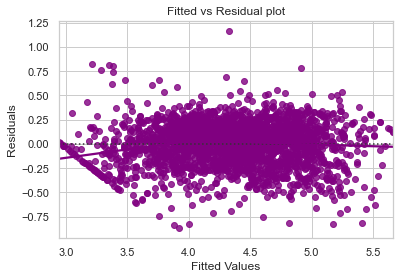

In [139]:
#plotting the table looking for a pattern 

sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
               )
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

#I see a pattern


In [140]:
#reviewing remaining columns in training set 
x_train43.columns


Index(['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'battery',
       'normalized_new_price', 'weight_log', 'int_memory_log', '4g_num',
       'brand_name_Nokia', 'os_iOS'],
      dtype='object')

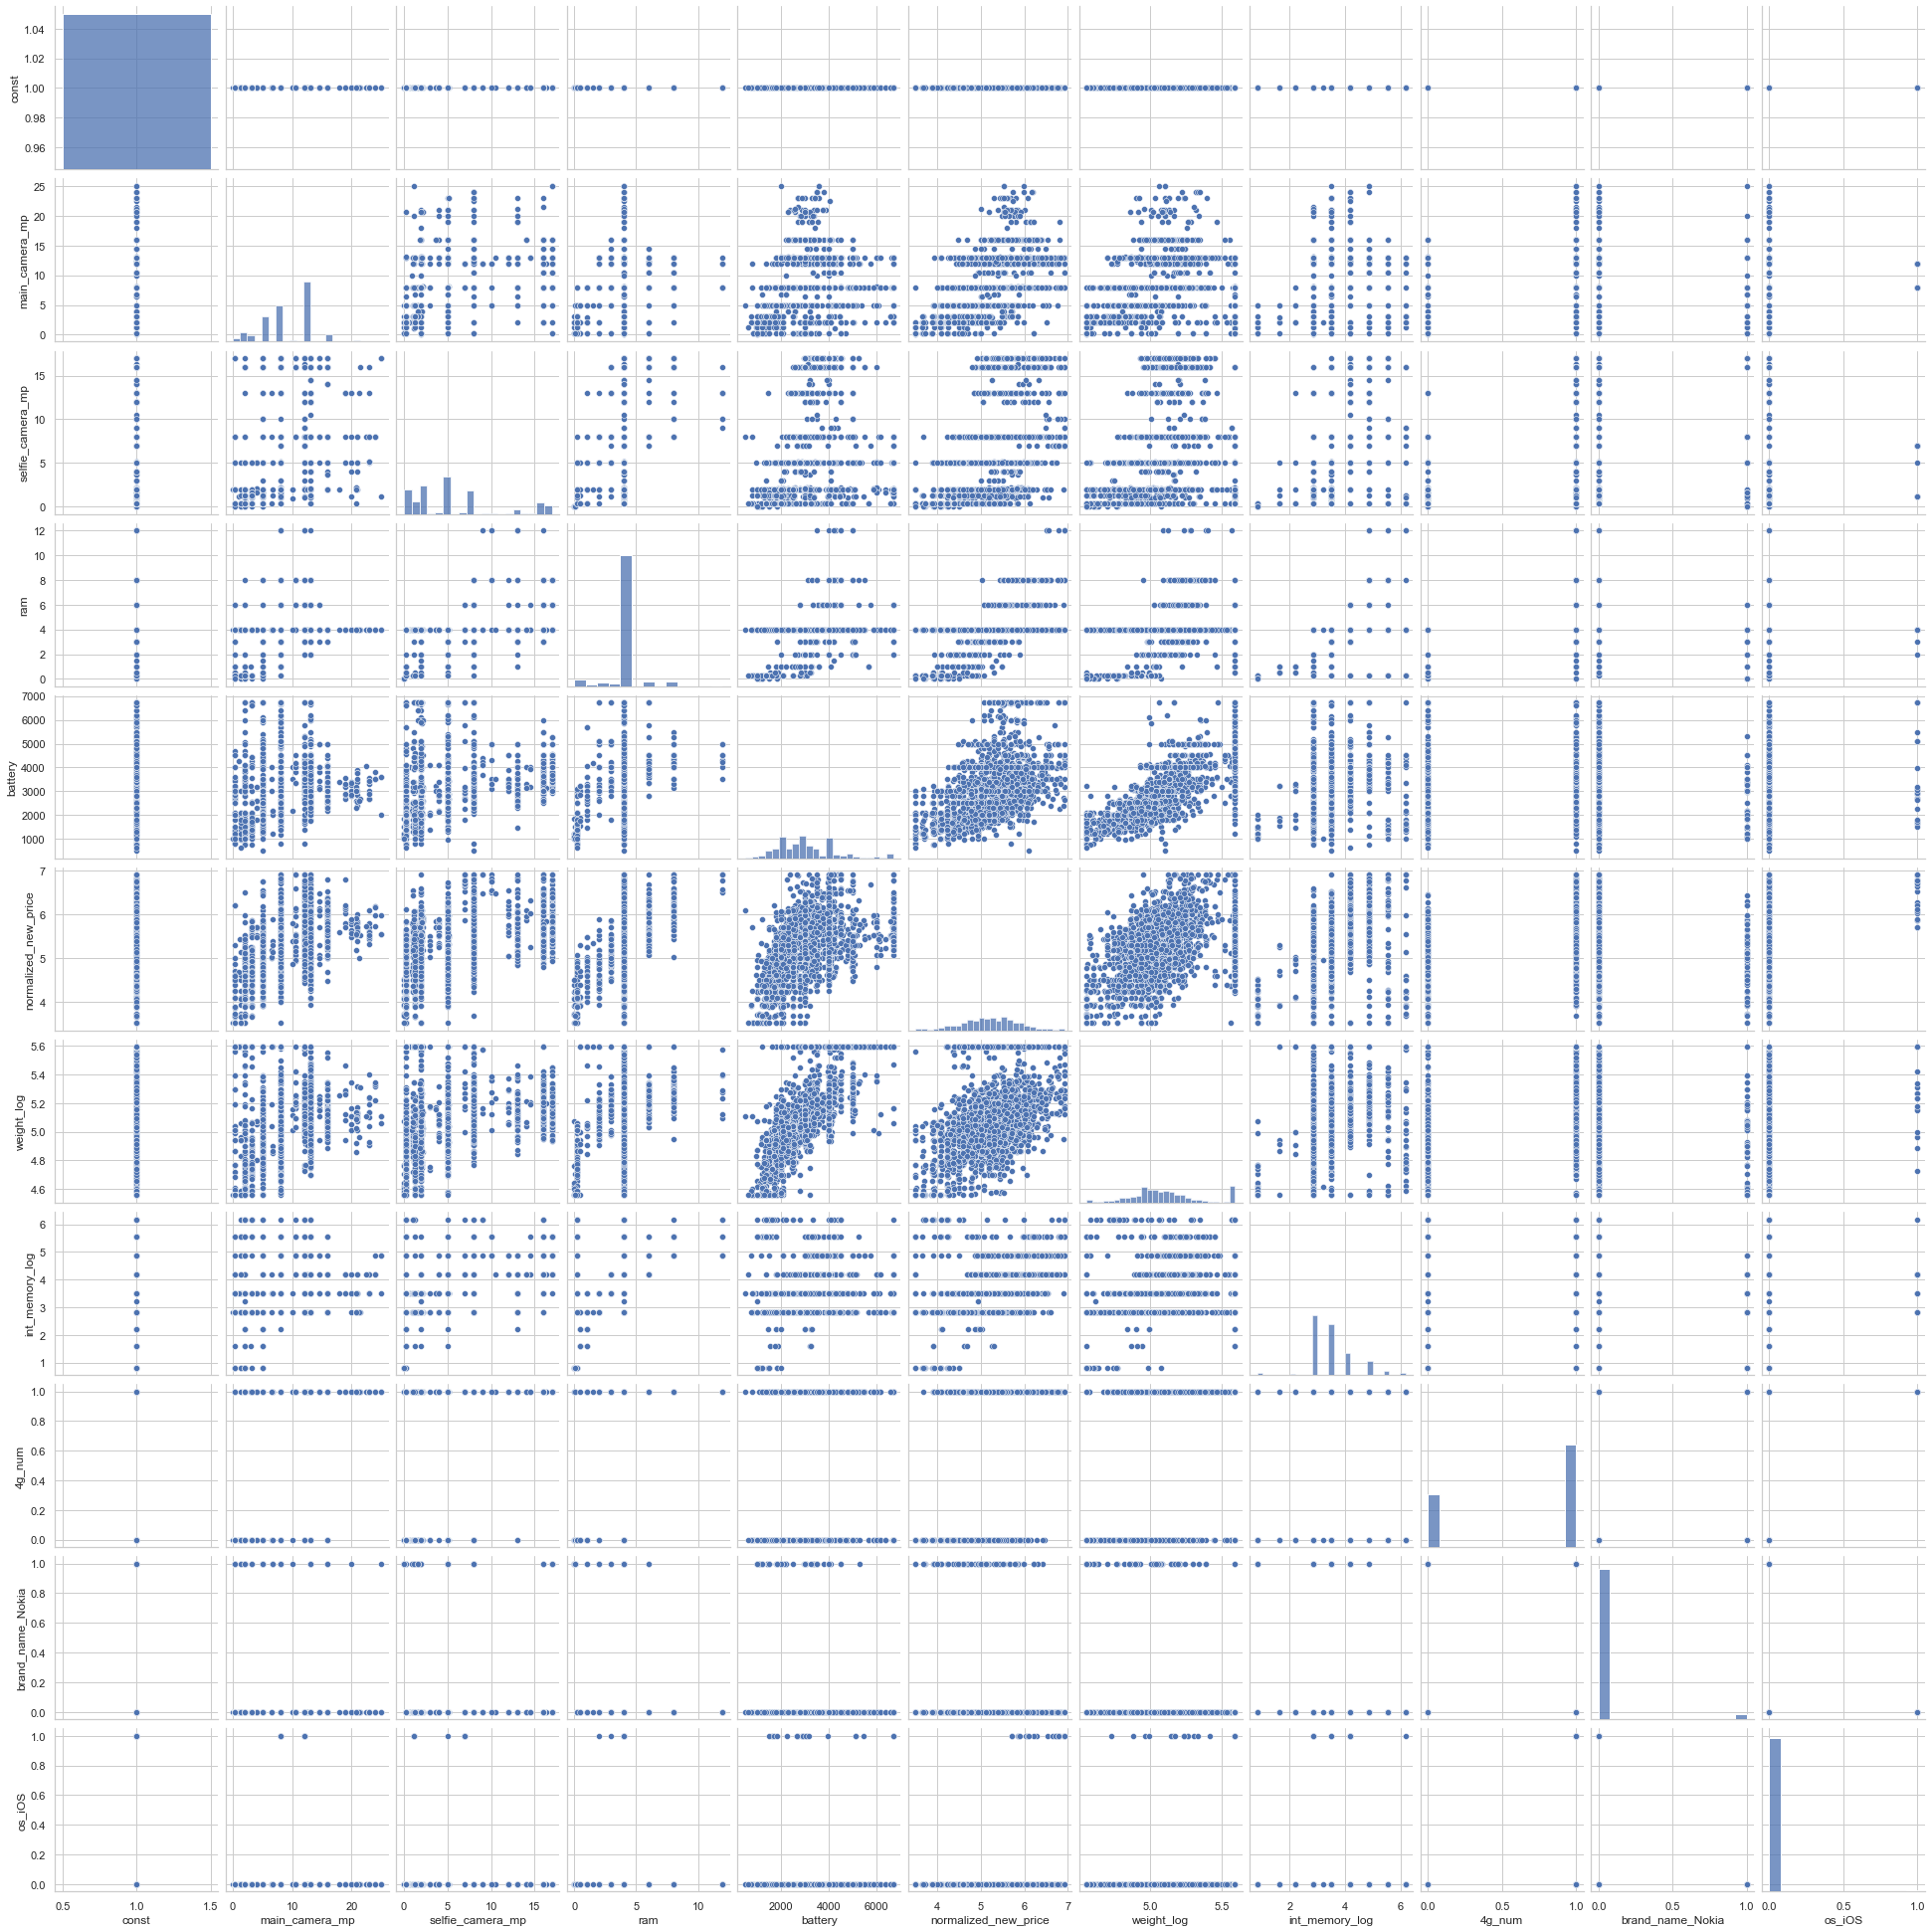

In [141]:
# checking the distribution of variables in training set with dependent variable
sns.pairplot(x_train43)

<AxesSubplot:>

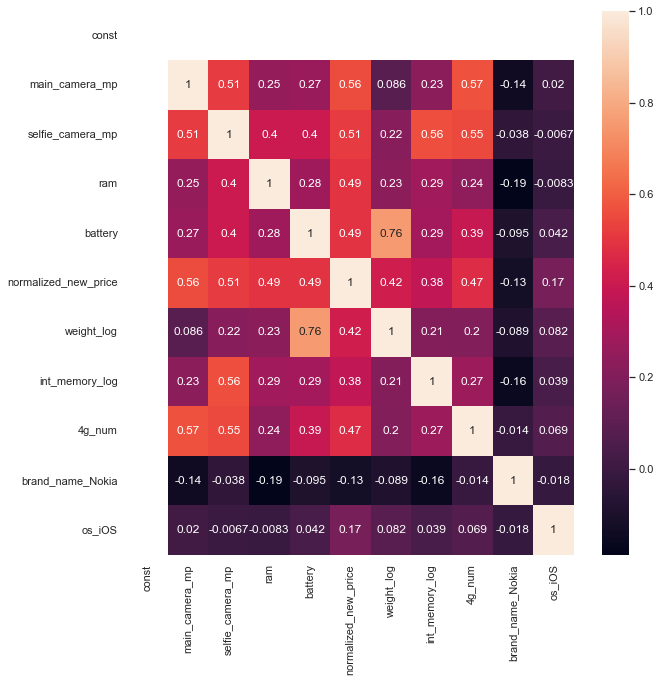

In [142]:
#correlation coefficients plot
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(x_train43.corr(), annot=True)  

<AxesSubplot:>

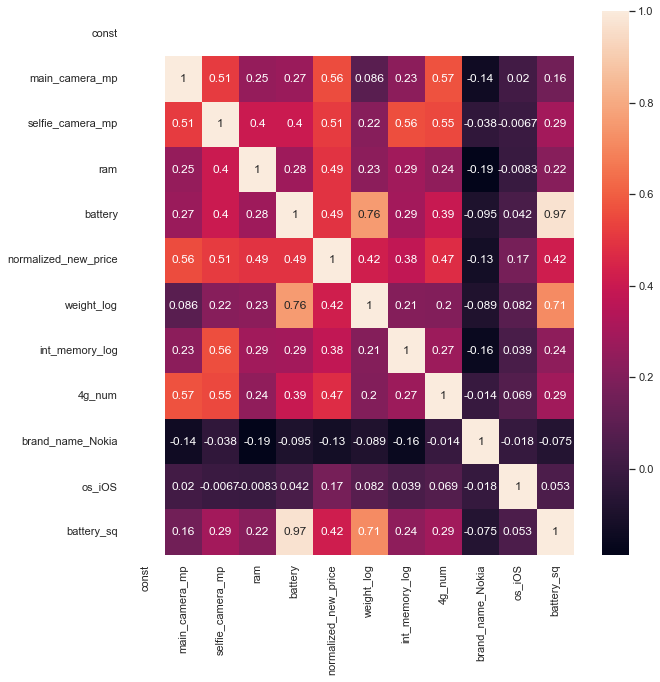

In [143]:
#battery appears to have a strong relationshpi with weight_log 
#also looks like a pattern with normalized_new_price 
#going to square battery to see if the relationship adjusts 

x_train43['battery_sq']=np.square(x_train43['battery'])

#re-runinng heat map
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(x_train43.corr(), annot=True)  

In [144]:
#still just as strong - going to test just removing weight_log and battery entirely 
x_train44 = x_train43.drop(['battery', 'battery_sq'], axis = 1)

#Run new olsmodel after dropping brand_name_Xiaomi
olsmodel44 = sm.OLS(y_train, x_train44).fit()
print(olsmodel44.summary())

#drops down to .828, only .002 lower than before 


                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.828
Model:                               OLS   Adj. R-squared:                  0.827
Method:                    Least Squares   F-statistic:                     1210.
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:46:06   Log-Likelihood:                 118.23
No. Observations:                   2277   AIC:                            -216.5
Df Residuals:                       2267   BIC:                            -159.2
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [145]:
#going to test just removing weight_log instead of battery 
x_train45 = x_train43.drop(['weight_log'], axis = 1)

#Run new olsmodel after dropping brand_name_Xiaomi
olsmodel45 = sm.OLS(y_train, x_train45).fit()
print(olsmodel45.summary())

#woah! WAY lower, almost .06
#weight has a much stronger impact
#will keep that and remove battery - x_train44 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.814
Model:                               OLS   Adj. R-squared:                  0.813
Method:                    Least Squares   F-statistic:                     992.7
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:46:06   Log-Likelihood:                 32.520
No. Observations:                   2277   AIC:                            -43.04
Df Residuals:                       2266   BIC:                             20.00
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [146]:
#re-creating the subtable to note any pattern shifts 
df_pred2 = pd.DataFrame()
 
df_pred2["Actual Values"] = y_train.values.flatten()  # actual values
df_pred2["Fitted Values"] = olsmodel44.fittedvalues.values  # predicted values
df_pred2["Residuals"] = olsmodel44.resid.values  # residuals
 
df_pred2.head()

,Actual Values,Fitted Values,Residuals
0,4.344065,4.519314,-0.175249
1,3.156149,3.620081,-0.463932
2,4.725616,4.490353,0.235264
3,5.127826,4.832376,0.295449
4,4.792396,4.687814,0.104582


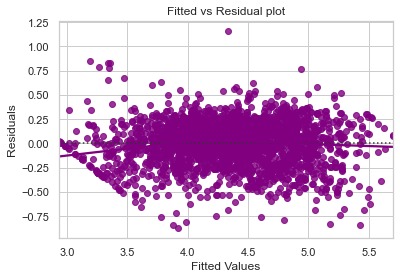

In [147]:
#plotting the new table looking for a pattern 

sns.set_style("whitegrid")
sns.residplot(
    data=df_pred2, x="Fitted Values", y="Residuals", color="purple", lowess=True
               )
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

#still seeing the pattern 

In [148]:
#going to square normalized_new_price, which appeared to have a pattern with weight_log 
x_train44['normalized_new_price_sq']=np.square(x_train44['normalized_new_price'])
x_train46 = x_train44.drop(['normalized_new_price'], axis = 1)

x_train46.head()

,const,main_camera_mp,selfie_camera_mp,ram,weight_log,int_memory_log,4g_num,brand_name_Nokia,os_iOS,normalized_new_price_sq
1443,1.0,8.0,2.0,4.0,5.231649,2.833213,1.0,0.0,0.0,32.538077
557,1.0,5.0,0.3,4.0,4.564359,2.833213,0.0,0.0,0.0,23.687649
1356,1.0,13.0,8.0,4.0,4.969820,2.833213,1.0,0.0,0.0,29.587830
1811,1.0,12.0,5.0,4.0,5.062601,4.174387,1.0,0.0,0.0,39.831580
201,1.0,12.0,17.0,4.0,5.157911,4.174387,1.0,0.0,0.0,26.308574


In [149]:
#Run new olsmodel after dropping normalized_new_price in favor of squared version
olsmodel46 = sm.OLS(y_train, x_train46).fit()
print(olsmodel46.summary())

#droppd a bit but not as much as dropping weight_log
#noticing os_ios has quite high p value. 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.823
Model:                               OLS   Adj. R-squared:                  0.822
Method:                    Least Squares   F-statistic:                     1171.
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:46:07   Log-Likelihood:                 87.749
No. Observations:                   2277   AIC:                            -155.5
Df Residuals:                       2267   BIC:                            -98.19
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [150]:
#dropping os_iOS to see impact on r2
x_train47 = x_train46.drop(['os_iOS'], axis = 1)

#Run new olsmodel after dropping os_iOS in favor of squared version
olsmodel47 = sm.OLS(y_train, x_train47).fit()
print(olsmodel47.summary())

#ooh barely a change! Leaving it out and checking linearity again 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.823
Model:                               OLS   Adj. R-squared:                  0.822
Method:                    Least Squares   F-statistic:                     1317.
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:46:25   Log-Likelihood:                 87.000
No. Observations:                   2277   AIC:                            -156.0
Df Residuals:                       2268   BIC:                            -104.4
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [151]:
#re-creating the subtable again to note any pattern shifts 
df_pred3 = pd.DataFrame()
 
df_pred3["Actual Values"] = y_train.values.flatten()  # actual values
df_pred3["Fitted Values"] = olsmodel47.fittedvalues.values  # predicted values
df_pred3["Residuals"] = olsmodel47.resid.values  # residuals
 
df_pred3.head()

,Actual Values,Fitted Values,Residuals
0,4.344065,4.514990,-0.170925
1,3.156149,3.596591,-0.440442
2,4.725616,4.486079,0.239537
3,5.127826,4.848321,0.279504
4,4.792396,4.677180,0.115216


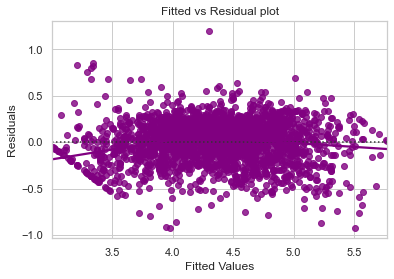

In [152]:
#plotting the new table looking for a pattern 

sns.set_style("whitegrid")
sns.residplot(
    data=df_pred3, x="Fitted Values", y="Residuals", color="purple", lowess=True
               )
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

#still super strong pattern 

In [153]:
#dropping price to see impact on r2
x_train48 = x_train47.drop(['normalized_new_price_sq'], axis = 1)

#Run new olsmodel after dropping os_iOS in favor of squared version
olsmodel48 = sm.OLS(y_train, x_train48).fit()
print(olsmodel48.summary())

#super low, leaving it in 
#not seeing any other patterns with other variables
#choosing to move forward without removing anything else 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.730
Model:                               OLS   Adj. R-squared:                  0.729
Method:                    Least Squares   F-statistic:                     877.1
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:46:29   Log-Likelihood:                -392.04
No. Observations:                   2277   AIC:                             800.1
Df Residuals:                       2269   BIC:                             845.9
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const     

### Verifying Normality / Normal Distribution 
- plotting the shape of the residuals for the latest mode 
- want them to be normally distributed 

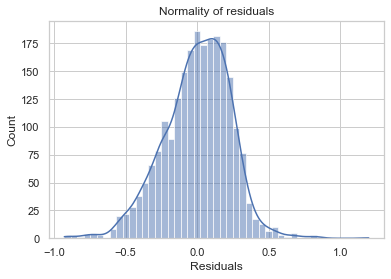

In [154]:
#creating histplot of final residual table above 
sns.histplot(df_pred3["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

#VERY slight skew but feeling ok about distribution 

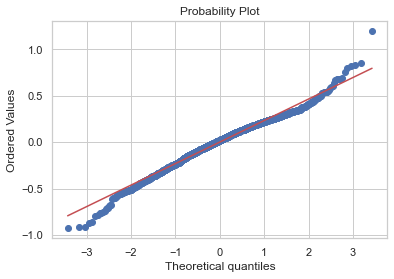

In [155]:
#creating QQ plot to confirm they stick fairly close to the line 
import pylab
import scipy.stats as stats
 
stats.probplot(df_pred3["Residuals"], dist="norm", plot=pylab)
plt.show()

#again, seeing the slight shift on the lower and very upper ends but only slightly 
#saw similar shapes in training videos which was accepted 
# will move foward  

### Test for homoscedasticity
- running goldfeldquandt test (P>0.05 = homoscedasticic
- variance of residuals should be symmetrically distributed across the regression line 

In [156]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train47)
lzip(name, test)

#p value = 0.06, which tells us is it heteroscedasticity 
#we need to transform some more variables 

[('F statistic', 1.0968146028106807), ('p-value', 0.06029983129566732)]

In [157]:
#dropping int_memory_log  to see impact on r2 as it had a relationship with selfie camera mp
x_train49 = x_train47.drop(['int_memory_log'], axis = 1)

#Run new olsmodel after dropping int_memory_log in favor of squared version
olsmodel49 = sm.OLS(y_train, x_train49).fit()
print(olsmodel49.summary())

#only slight dip
#running goldfeldquandt again 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.822
Model:                               OLS   Adj. R-squared:                  0.822
Method:                    Least Squares   F-statistic:                     1502.
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:46:34   Log-Likelihood:                 84.561
No. Observations:                   2277   AIC:                            -153.1
Df Residuals:                       2269   BIC:                            -107.3
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [158]:
#re-running goldfeldquandt after removing int_memory_log
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train49)
lzip(name, test)

#lowered p value only slightly, need to transform more 

[('F statistic', 1.0970911271156758), ('p-value', 0.05971345744481157)]

In [159]:
#dropping brand_name_Nokia  to see impact on r2 as its p value has jumped
x_train50 = x_train49.drop(['brand_name_Nokia'], axis = 1)

#Run new olsmodel after dropping int_memory_log in favor of squared version
olsmodel50 = sm.OLS(y_train, x_train50).fit()
print(olsmodel50.summary())

#no change, keeping out 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.822
Model:                               OLS   Adj. R-squared:                  0.822
Method:                    Least Squares   F-statistic:                     1749.
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:46:36   Log-Likelihood:                 82.724
No. Observations:                   2277   AIC:                            -151.4
Df Residuals:                       2270   BIC:                            -111.3
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [160]:
#performing log transformation on both camera mp values 
x_train50['main_camera_mp_log']=np.log(x_train50['main_camera_mp']+.001)
x_train50['selfie_camera_mp_log']=np.log(x_train50['selfie_camera_mp']+.001)

x_train50.head()

,const,main_camera_mp,selfie_camera_mp,ram,weight_log,4g_num,normalized_new_price_sq,main_camera_mp_log,selfie_camera_mp_log
1443,1.0,8.0,2.0,4.0,5.231649,1.0,32.538077,2.079567,0.693647
557,1.0,5.0,0.3,4.0,4.564359,0.0,23.687649,1.609638,-1.200645
1356,1.0,13.0,8.0,4.0,4.969820,1.0,29.587830,2.565026,2.079567
1811,1.0,12.0,5.0,4.0,5.062601,1.0,39.831580,2.484990,1.609638
201,1.0,12.0,17.0,4.0,5.157911,1.0,26.308574,2.484990,2.833272


In [161]:
#dropping original main camera column 
x_train51 = x_train50.drop(['main_camera_mp'], axis = 1)
x_train51.head()

,const,selfie_camera_mp,ram,weight_log,4g_num,normalized_new_price_sq,main_camera_mp_log,selfie_camera_mp_log
1443,1.0,2.0,4.0,5.231649,1.0,32.538077,2.079567,0.693647
557,1.0,0.3,4.0,4.564359,0.0,23.687649,1.609638,-1.200645
1356,1.0,8.0,4.0,4.969820,1.0,29.587830,2.565026,2.079567
1811,1.0,5.0,4.0,5.062601,1.0,39.831580,2.484990,1.609638
201,1.0,17.0,4.0,5.157911,1.0,26.308574,2.484990,2.833272


In [162]:
#dropping original main camera column 
x_train51 = x_train51.drop(['selfie_camera_mp'], axis = 1)
x_train51.head()

,const,ram,weight_log,4g_num,normalized_new_price_sq,main_camera_mp_log,selfie_camera_mp_log
1443,1.0,4.0,5.231649,1.0,32.538077,2.079567,0.693647
557,1.0,4.0,4.564359,0.0,23.687649,1.609638,-1.200645
1356,1.0,4.0,4.969820,1.0,29.587830,2.565026,2.079567
1811,1.0,4.0,5.062601,1.0,39.831580,2.484990,1.609638
201,1.0,4.0,5.157911,1.0,26.308574,2.484990,2.833272


In [163]:
#Run new olsmodel with new camera log fields
olsmodel51 = sm.OLS(y_train, x_train51).fit()
print(olsmodel51.summary())

#r2 is ok, only dropped .001
#p values look ok 

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.803
Model:                               OLS   Adj. R-squared:                  0.802
Method:                    Least Squares   F-statistic:                     1538.
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:46:42   Log-Likelihood:                -36.485
No. Observations:                   2277   AIC:                             86.97
Df Residuals:                       2270   BIC:                             127.1
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [164]:
#re-creating the subtable again to note any pattern shifts 
df_pred4 = pd.DataFrame()
 
df_pred4["Actual Values"] = y_train.values.flatten()  # actual values
df_pred4["Fitted Values"] = olsmodel47.fittedvalues.values  # predicted values
df_pred4["Residuals"] = olsmodel47.resid.values  # residuals
 
df_pred4.head()

,Actual Values,Fitted Values,Residuals
0,4.344065,4.514990,-0.170925
1,3.156149,3.596591,-0.440442
2,4.725616,4.486079,0.239537
3,5.127826,4.848321,0.279504
4,4.792396,4.677180,0.115216


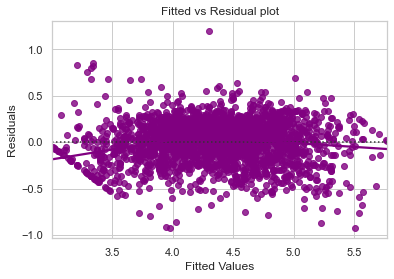

In [165]:
#plotting the new table looking for a pattern 

sns.set_style("whitegrid")
sns.residplot(
    data=df_pred4, x="Fitted Values", y="Residuals", color="purple", lowess=True
               )
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

#barely any shift but still moving foward

In [166]:
#running goldfeldquandt test on 51 version
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred4["Residuals"], x_train51)
lzip(name, test)

#P value almost doubled.... 
#this is terrible.... 
#maybe try a different kind of transformation? 

[('F statistic', 1.0829973846544443), ('p-value', 0.09003237945810787)]

In [172]:
#going back to version 50, applying square root not log 
import math

#performing sqrt transformation on both camera mp values 
x_train50['main_camera_mp_sqrt']=np.sqrt(x_train50['main_camera_mp'])
x_train50['selfie_camera_mp_sqrt']=np.sqrt(x_train50['selfie_camera_mp'])

x_train50.head()

,const,main_camera_mp,selfie_camera_mp,ram,weight_log,4g_num,normalized_new_price_sq,main_camera_mp_log,selfie_camera_mp_log,main_camera_mp_sqrt,selfie_camera_mp_sqrt
1443,1.0,8.0,2.0,4.0,5.231649,1.0,32.538077,2.079567,0.693647,2.828427,1.414214
557,1.0,5.0,0.3,4.0,4.564359,0.0,23.687649,1.609638,-1.200645,2.236068,0.547723
1356,1.0,13.0,8.0,4.0,4.969820,1.0,29.587830,2.565026,2.079567,3.605551,2.828427
1811,1.0,12.0,5.0,4.0,5.062601,1.0,39.831580,2.484990,1.609638,3.464102,2.236068
201,1.0,12.0,17.0,4.0,5.157911,1.0,26.308574,2.484990,2.833272,3.464102,4.123106


In [173]:
#dropping log and original camera mp columns for 52
x_train52 = x_train50.drop(['selfie_camera_mp','main_camera_mp','main_camera_mp_log','selfie_camera_mp_log'], axis = 1)
x_train52.head()

,const,ram,weight_log,4g_num,normalized_new_price_sq,main_camera_mp_sqrt,selfie_camera_mp_sqrt
1443,1.0,4.0,5.231649,1.0,32.538077,2.828427,1.414214
557,1.0,4.0,4.564359,0.0,23.687649,2.236068,0.547723
1356,1.0,4.0,4.969820,1.0,29.587830,3.605551,2.828427
1811,1.0,4.0,5.062601,1.0,39.831580,3.464102,2.236068
201,1.0,4.0,5.157911,1.0,26.308574,3.464102,4.123106


In [174]:
#Run new olsmodel with new camera sqrt fields
olsmodel52 = sm.OLS(y_train, x_train52).fit()
print(olsmodel52.summary())

#r2 actually increased

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.824
Model:                               OLS   Adj. R-squared:                  0.823
Method:                    Least Squares   F-statistic:                     1766.
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           21:56:04   Log-Likelihood:                 91.582
No. Observations:                   2277   AIC:                            -169.2
Df Residuals:                       2270   BIC:                            -129.0
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [175]:
#re-creating the residuals table again to note any pattern shifts 
df_pred5 = pd.DataFrame()
 
df_pred5["Actual Values"] = y_train.values.flatten()  # actual values
df_pred5["Fitted Values"] = olsmodel52.fittedvalues.values  # predicted values
df_pred5["Residuals"] = olsmodel52.resid.values  # residuals
 
df_pred5.head()

,Actual Values,Fitted Values,Residuals
0,4.344065,4.537250,-0.193184
1,3.156149,3.579204,-0.423055
2,4.725616,4.517723,0.207894
3,5.127826,4.860746,0.267079
4,4.792396,4.653799,0.138597


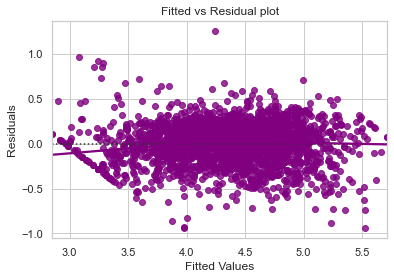

In [177]:
#plotting the new table looking for a pattern 

sns.set_style("whitegrid")
sns.residplot(
    data=df_pred5, x="Fitted Values", y="Residuals", color="purple", lowess=True
               )
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

In [178]:
#running goldfeldquandt test on 52nd version
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred5["Residuals"], x_train52)
lzip(name, test)

#.....still very high
#think I might go back to the version that was closest to .05 and move forward with that 
# no transformations on these, still strong r2, still 94.9 confident

[('F statistic', 1.0864836728245766), ('p-value', 0.08157172694940838)]

In [179]:
#going back to version 49
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train49)
lzip(name, test)

#lowered p value only slightly, need to transform more 

[('F statistic', 1.0970911271156758), ('p-value', 0.05971345744481157)]

In [180]:
#Run new olsmodel with version 49 again 
olsmodel49 = sm.OLS(y_train, x_train49).fit()
print(olsmodel49.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.822
Model:                               OLS   Adj. R-squared:                  0.822
Method:                    Least Squares   F-statistic:                     1502.
Date:                   Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                           22:00:30   Log-Likelihood:                 84.561
No. Observations:                   2277   AIC:                            -153.1
Df Residuals:                       2269   BIC:                            -107.3
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

### Final model equation and checks against test data 

In [181]:
#Check parameters 
olsmodel49.params

const                     -0.421102
main_camera_mp             0.023737
selfie_camera_mp           0.022476
ram                        0.016738
weight_log                 0.650770
4g_num                     0.057966
brand_name_Nokia           0.054251
normalized_new_price_sq    0.036268
dtype: float64

In [203]:
#Write the equation 
 
Equation = "normalized used price ="
print(Equation, end=" ")
for i in range(len(x_train49.columns)):
    if i == 0:
        print(olsmodel49.params[i], "+", end=" ")
    elif i != len(x_train49.columns) - 1:
        print(
            olsmodel49.params[i],
            "* (",
            x_train49.columns[i],
            ")",
            "+",
            end="  ",
        )
else:
    print(olsmodel49.params[i], "* (", x_train49.columns[i], ")")


normalized used price = -0.42110208548879413 + 0.023736988354090955 * ( main_camera_mp ) +  0.022476295938774513 * ( selfie_camera_mp ) +  0.016738048820802924 * ( ram ) +  0.6507699274983253 * ( weight_log ) +  0.05796577406432829 * ( 4g_num ) +  0.054250523745607224 * ( brand_name_Nokia ) +  0.03626807871135787 * ( normalized_new_price_sq )


Update test data to match your columns in test 
Remove any dropped columns 
add any squared or log columns 
create any dummy variables 
 
    #dropping columns from the test data that are not there in the training data
    x_test2 = X_test.drop(
        ["cylinders", "displacement", "horsepower", "acceleration"], axis=1
    )


In [186]:
x_test.head().T

,2102,1063,376,1386,1190
const,1.000000,1.000000,1.000000,1.000000,1.000000
main_camera_mp,3.150000,16.000000,5.000000,13.000000,21.000000
selfie_camera_mp,0.000000,8.000000,2.000000,5.000000,4.000000
ram,0.020000,4.000000,2.000000,4.000000,4.000000
battery,1200.000000,2500.000000,4200.000000,4050.000000,2840.000000
days_used,668.000000,738.000000,852.000000,722.000000,895.000000
normalized_new_price,4.382527,5.831325,5.401641,5.803326,6.174973
weight_log,4.587016,5.010642,5.592742,5.308273,5.123970
int_memory_log,0.821452,2.833213,2.833213,2.833213,3.496508
4g_num,0.000000,1.000000,1.000000,1.000000,1.000000


In [204]:
#Adjusting test data to match train data columns 

x_test2 = x_test.drop(['battery','days_used','int_memory_log','5g_num','brand_name_Alcatel',
                        'brand_name_Apple','brand_name_Asus','brand_name_BlackBerry',
                       'brand_name_Celkon','brand_name_Coolpad','brand_name_Gionee',
                       'brand_name_Google','brand_name_HTC','brand_name_Honor','brand_name_Huawei',
                       'brand_name_Karbonn','brand_name_LG','brand_name_Lava','brand_name_Lenovo',
                       'brand_name_Meizu','brand_name_Micromax','brand_name_Microsoft','brand_name_Motorola',
                       'brand_name_OnePlus','brand_name_Oppo','brand_name_Others','brand_name_Panasonic',
                       'brand_name_Realme','brand_name_Samsung','brand_name_Sony','brand_name_Spice',
                       'brand_name_Vivo','brand_name_XOLO','brand_name_Xiaomi','brand_name_ZTE','os_Others',
                       'os_Windows','os_iOS','release_year_2014','release_year_2015','release_year_2016',
                       'release_year_2017','release_year_2018','release_year_2019','release_year_2020'],
                      axis = 1)
x_test2.head()

,const,main_camera_mp,selfie_camera_mp,ram,normalized_new_price,weight_log,4g_num,brand_name_Nokia
2102,1.0,3.15,0.0,0.02,4.382527,4.587016,0.0,1.0
1063,1.0,16.00,8.0,4.00,5.831325,5.010642,1.0,0.0
376,1.0,5.00,2.0,2.00,5.401641,5.592742,1.0,0.0
1386,1.0,13.00,5.0,4.00,5.803326,5.308273,1.0,0.0
1190,1.0,21.00,4.0,4.00,6.174973,5.123970,1.0,0.0


In [196]:
x_test2['normalized_new_price_sq']=np.square(x_test2['normalized_new_price'])
x_test3 = x_test2.drop(['normalized_new_price'], axis=1)

x_test3.head()

,const,main_camera_mp,selfie_camera_mp,ram,weight_log,4g_num,brand_name_Nokia,normalized_new_price_sq
2102,1.0,3.15,0.0,0.02,4.587016,0.0,1.0,19.206539
1063,1.0,16.00,8.0,4.00,5.010642,1.0,0.0,34.004353
376,1.0,5.00,2.0,2.00,5.592742,1.0,0.0,29.177723
1386,1.0,13.00,5.0,4.00,5.308273,1.0,0.0,33.678594
1190,1.0,21.00,4.0,4.00,5.123970,1.0,0.0,38.130290


In [197]:
#Make predictions on the test set 
 
y_pred = olsmodel49.predict(x_test3)

In [198]:
#re-creating the residuals table with our final version 49 model 
df_pred6 = pd.DataFrame()
 
df_pred6["Actual Values"] = y_train.values.flatten()  # actual values
df_pred6["Fitted Values"] = olsmodel49.fittedvalues.values  # predicted values
df_pred6["Residuals"] = olsmodel49.resid.values  # residuals
 
df_pred6.head()

,Actual Values,Fitted Values,Residuals
0,4.344065,4.523357,-0.179292
1,3.156149,3.600731,-0.444582
2,4.725616,4.499510,0.226106
3,5.127826,4.840245,0.287581
4,4.792396,4.681532,0.110865


In [199]:
#check the RMSE on train data 
rmse_train = np.sqrt(mean_squared_error(y_train, df_pred6["Fitted Values"]))
rmse_train

0.2331495074617833

In [200]:
#check the RMSE on test data 
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_test

0.23640791101636224

#### RMSE's for both train and test data are quite close - .003 apart 
Shows we did not overfit the model 

In [201]:
#check the MAE on train data 
mae_train = mean_absolute_error(y_train, df_pred6["Fitted Values"])
mae_train

0.1826699860709442

In [202]:
#check the MAE on test data 
mae_test = mean_absolute_error(y_test, y_pred)
mae_test

0.18751032016376584

#### Again, MAE is quite close, .005 apart 
Our model can predict the expected used price within .18 *normalized* units

## Final Model Summary

- final model equation: 

normalized used price = -0.42110208548879413 + 0.023736988354090955 * ( main_camera_mp ) +  0.022476295938774513 * ( selfie_camera_mp ) +  0.016738048820802924 * ( ram ) +  0.6507699274983253 * ( weight_log ) +  0.05796577406432829 * ( 4g_num ) +  0.054250523745607224 * ( brand_name_Nokia ) +  0.03626807871135787 * ( normalized_new_price_sq )

- influential factors included
    - main_camera_mp
    - selfie_camera_mp
        - both camera mp's had similar influence but were not correlated to one another 
    - ram
        - had slightly lower influence than other factors 
    - weight 
        - had the highest influence of all the factors 
    - 4g compatible 
    - Nokia branding 
        - 4g and Nokia had similar influence 
        - curious if for future models we'll see 5g carry similar influence as 4g as more phones offer it 
    - the normalized price when new 
        - moderate influence on price 
        
- constant begins the price at a negative slope 
    - logical due to the depreciation of the product 
    
- all other variables increase the price from that constant 

## Actionable Insights and Recommendations

**Thank you for the opportunity to build a model for you! Let's take a look at some themes.**

### Influential Variables to target 
I recommend targeting and prioritizing purchase of phones with the following variables 

*(note: other variables are still valuable, but these called out clearest in the model)*
- weight (heavier weights = higher price) 
    - weight was correlated with battery size and memory, so also keep an eye on these features 
- 4g compatible devices 
    - I would recommend also gathering 5g, as the technology was fairly new when this model ran 
- Nokia brand phones 
    - May have stronger lasting power and therefore higher resale value
    - Also nostalgia and meme culture around "unbreakable" Nokia phones give this brand higher demand 
- Larger main and selfie camera mp values 
- ram 
    - most ram values were similar, so the influence was not that strong in this data 
    - in future devices if RAM increases that could shift the influence 

### Ways to target 
- target ads based on previously purchased products, if access to demographic data is available 
- provide extra coupon or in store credit or free accessories with trade-in with those variables 
- run ads that "Not even 2020 could break this Nokia", etc.

### Future trends to watch for 
- If there are sales booms within these variables (ex: new camera technology everyone begins touting) watch for that resale wave in the next year 
- As technology improves, the weight factor may shift
    - due to parts becoming more efficient therefore requiring less space/material
    - trends shifting to smaller devices 
- Would recommend re-running in 6 months as 5g gains speed and smaller phone trends hit the market 